# **IMPORTATION DE LA BASE**

Le jeu de données Adult (ou "Census Income") est un ensemble de données utilisé pour prédire si le revenu d'un individu dépasse 50 000 dollars par an, en fonction de caractéristiques démographiques telles que l'âge, l'éducation, la profession et le statut marital. Ce domaine relève de l'économie, de la sociologie et de la gestion des ressources humaines. Il est souvent utilisé pour étudier les inégalités de revenus, les tendances du marché du travail et les politiques publiques. Pour les entreprises, il peut aider à segmenter les clients ou à prédire le potentiel de revenus. Pour les gouvernements, il est utile pour évaluer l'impact des politiques sociales et économiques. Ce dataset est également un benchmark populaire pour tester des algorithmes de classification et de prédiction.

# ***Dummarization***

In [181]:


import pandas as pd

# Import necessary libraries
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# URL du dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes du dataset
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race",
    "sex", "capital-gain", "capital-loss", "hours-per-week",
    "native-country", "income"
]

# Charger le dataset
data = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

# Liste des colonnes à dumérifier, en supprimant "education"
categorical_cols = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]

# Supprimer la colonne "education" du DataFrame
data = data.drop(columns=["education"])

# Dumérification des colonnes sélectionnées
data_dummies = pd.get_dummies(data[categorical_cols], drop_first=True)

# Convertir les dummies en 0 et 1
data_dummies = data_dummies.astype(int)

# Joindre les variables dummys avec le reste des données
data = pd.concat([data.drop(columns=categorical_cols), data_dummies], axis=1)

# Afficher la base dumérifiée
data


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [182]:

# Identify the income dummy column (it will have '>50K' in the name)
income_col = None
for col in data.columns:
    if '>50K' in col:
        income_col = col
        break

if income_col:
    data.rename(columns={income_col: "income"}, inplace=True)
    print(f"Renamed '{income_col}' to 'income'")
else:
    # If no such column exists, maybe it was removed earlier - make sure a new 'income' column exists
    if 'income' not in data.columns:
        # Assuming a binary classification, we will create the column from the appropriate dummy columns
        # Determine the original income column name before dummification
        income_col = None
        for col in categorical_cols:
            if col == "income":
                income_col = col
                break

        if income_col:
            # Create the 'income' column if it doesn't exist
            income_dummy_columns = [col for col in data.columns if income_col in col]
            if income_dummy_columns:
              data["income"] = data[income_dummy_columns[0]]
              print(f"Created 'income' column from {income_dummy_columns[0]}")
        else:
            print("Error: Could not find appropriate dummy column for income")
    else:
        print("'income' column already exists.")


# Display the updated DataFrame
data


Renamed 'income_>50K' to 'income'


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


***separation de la variable Target avec les autre variables de la base***

In [183]:


# Séparer la variable cible 'income' du reste des données
X_cancer = data.drop('income', axis=1)
y_cancer = data['income']

print("Dataset shape:", X_cancer.shape, y_cancer.shape)


Dataset shape: (32561, 85) (32561,)


In [184]:
# Split the data into training, validation, and testing sets
X_train_cancer, X_temp_cancer, y_train_cancer, y_temp_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42
)
X_val_cancer, X_test_cancer, y_val_cancer, y_test_cancer = train_test_split(
    X_temp_cancer, y_temp_cancer, test_size=0.5, random_state=42
)


In [185]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_cancer = scaler.fit_transform(X_train_cancer)
X_val_cancer = scaler.transform(X_val_cancer)
X_test_cancer = scaler.transform(X_test_cancer)

**## Modele avec constante**

In [186]:
# Ajouter un biais pour le terme d'interception
X_train_cancer_bias = np.c_[np.ones(X_train_cancer.shape[0]), X_train_cancer]  # Ajouter une colonne de 1
X_val_cancer_bias = np.c_[np.ones(X_val_cancer.shape[0]), X_val_cancer]
X_test_cancer_bias = np.c_[np.ones(X_test_cancer.shape[0]), X_test_cancer]



# **Choix de la fonction de cout**

In [187]:
def logistic_loss(weights, X, y):
    predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)  # Éviter les logarithmes de zéro
    return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

# **Descente de Gradiant**

In [188]:
import time
def gradient_descent(X, y, X_val, y_val, learning_rate=0.01, n_iter=2000, tolerance=1e-6):
    weights = np.random.randn(X.shape[1]) * 0.01  # Initialisation des poids
    train_losses_grad = []
    val_losses = []

    # Démarrer le chronomètre
    start_time = time.time()

    for i in range(n_iter):
        # Calculer les prédictions
        predictions = 1 / (1 + np.exp(-X @ weights))

        # Calculer le gradient
        grad = -X.T @ (y - predictions) / len(y)  # Gradient basé sur les prédictions

        # Mettre à jour les poids
        new_weights = weights - learning_rate * grad

        # Vérifier la convergence
        if np.linalg.norm(new_weights - weights) < tolerance:
            break

        weights = new_weights  # Mettre à jour les poids

        # Calculer et enregistrer la perte
        train_loss_grad = logistic_loss(weights, X, y)
        val_loss = logistic_loss(weights, X_val, y_val)
        train_losses_grad.append(train_loss_grad)
        val_losses.append(val_loss)

        # Optionnel : calculer et afficher la perte
        print(f"Iteration {i}: Loss = {train_loss_grad}")  # Afficher la perte pour chaque itération

    # Arrêter le chronomètre
    end_time = time.time()
    convergence_time = end_time - start_time

    return weights, train_losses_grad, val_losses, convergence_time

In [189]:
# Entraîner le modèle
#trained_weights = gradient_descent(X_train_cancer_bias, y_train_cancer, learning_rate=0.01, n_iter=1000, tolerance=1e-6)
trained_weights, train_losses_grad, val_losses, convergence_time_grad = gradient_descent(X_train_cancer_bias, y_train_cancer, X_val_cancer_bias, y_val_cancer, learning_rate=0.01, n_iter=2000, tolerance=1e-6)
# Afficher les poids entraînés
print("Poids entraînés :", trained_weights)

# Calculer et afficher la perte finale
final_loss_grad = logistic_loss(trained_weights, X_train_cancer_bias, y_train_cancer)
print("Perte finale :", final_loss_grad)

Iteration 0: Loss = 0.6914002373247717
Iteration 1: Loss = 0.688937238760492
Iteration 2: Loss = 0.6865044914519476
Iteration 3: Loss = 0.6841015544120242
Iteration 4: Loss = 0.6817279916238088
Iteration 5: Loss = 0.679383372083
Iteration 6: Loss = 0.6770672698347834
Iteration 7: Loss = 0.6747792640053641
Iteration 8: Loss = 0.672518938828343
Iteration 9: Loss = 0.6702858836661266
Iteration 10: Loss = 0.6680796930265585
Iteration 11: Loss = 0.6658999665749613
Iteration 12: Loss = 0.6637463091417745
Iteration 13: Loss = 0.6616183307259725
Iteration 14: Loss = 0.6595156464944484
Iteration 15: Loss = 0.6574378767775392
Iteration 16: Loss = 0.6553846470608764
Iteration 17: Loss = 0.653355587973733
Iteration 18: Loss = 0.65135033527404
Iteration 19: Loss = 0.6493685298302415
Iteration 20: Loss = 0.6474098176001554
Iteration 21: Loss = 0.6454738496069969
Iteration 22: Loss = 0.6435602819127292
Iteration 23: Loss = 0.6416687755888881
Iteration 24: Loss = 0.639798996685037
Iteration 25: Loss =

In [190]:
convergence_time_grad

47.444732904434204

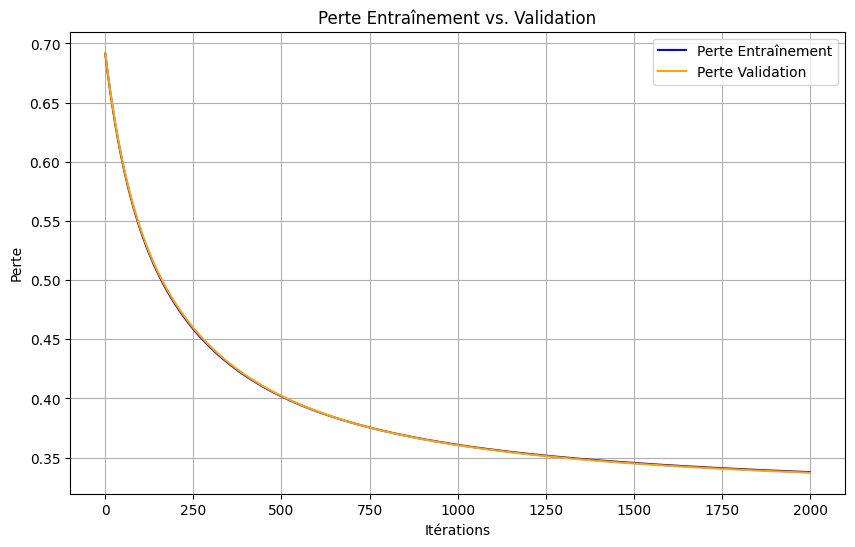

In [191]:

# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses_grad, label='Perte Entraînement', color='blue')
plt.plot(val_losses, label='Perte Validation', color='orange')
plt.title('Perte Entraînement vs. Validation')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [192]:
trained_weights_grad, train_losses_grad, test_losses_grad, convergence_time_grad = gradient_descent(X_train_cancer_bias, y_train_cancer, X_test_cancer_bias, y_test_cancer, learning_rate=0.01, n_iter=2000, tolerance=1e-6)
# Afficher les poids entraînés
#print("Poids entraînés :", trained_weights)

# Calculer et afficher la perte finale
final_loss_grad = logistic_loss(trained_weights_grad, X_test_cancer_bias, y_test_cancer)
print("Perte finale :", final_loss_grad)

Iteration 0: Loss = 0.6974899749746588
Iteration 1: Loss = 0.6949941622478375
Iteration 2: Loss = 0.6925286963034228
Iteration 3: Loss = 0.6900931410416132
Iteration 4: Loss = 0.6876870651012083
Iteration 5: Loss = 0.6853100419080507
Iteration 6: Loss = 0.6829616497179491
Iteration 7: Loss = 0.6806414716542569
Iteration 8: Loss = 0.6783490957402841
Iteration 9: Loss = 0.676084114926721
Iteration 10: Loss = 0.6738461271142527
Iteration 11: Loss = 0.6716347351715397
Iteration 12: Loss = 0.6694495469487461
Iteration 13: Loss = 0.6672901752867879
Iteration 14: Loss = 0.6651562380224808
Iteration 15: Loss = 0.6630473579897556
Iteration 16: Loss = 0.6609631630171195
Iteration 17: Loss = 0.6589032859215278
Iteration 18: Loss = 0.6568673644988323
Iteration 19: Loss = 0.6548550415109768
Iteration 20: Loss = 0.6528659646700921
Iteration 21: Loss = 0.6508997866196565
Iteration 22: Loss = 0.6489561649128711
Iteration 23: Loss = 0.6470347619884047
Iteration 24: Loss = 0.6451352451436518
Iteration 2

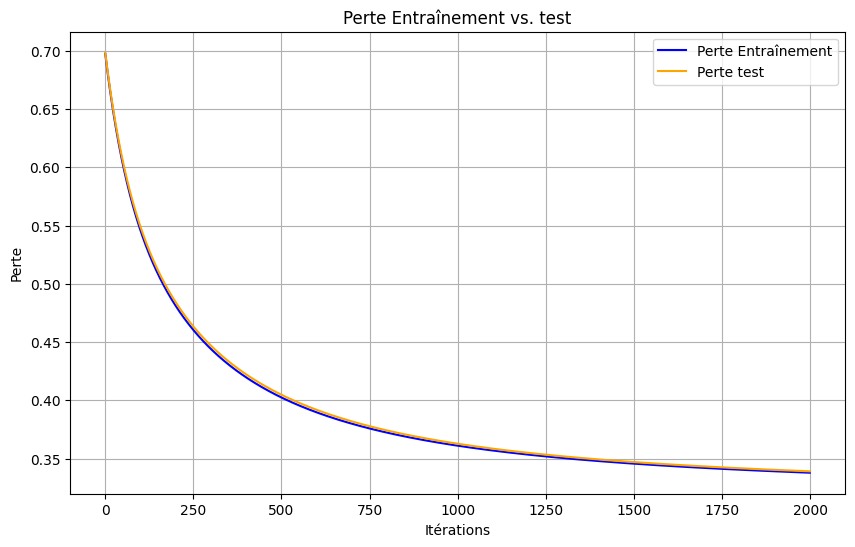

In [193]:
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses_grad, label='Perte Entraînement', color='blue')
plt.plot(test_losses_grad, label='Perte test', color='orange')
plt.title('Perte Entraînement vs. test')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [194]:
# prompt: calcul l'erreur de généralisation sur l'echantillon de test X_test_cancer_bias, y_test_cancer

# Calculer les prédictions sur l'ensemble de test
predictions_test = 1 / (1 + np.exp(-X_test_cancer_bias @ trained_weights_grad))

# Convertir les probabilités en prédictions binaires (0 ou 1)
y_pred_test = (predictions_test >= 0.5).astype(int)

# Calculer l'erreur de généralisation (taux d'erreur)
generalization_error_grad = np.mean(y_pred_test != y_test_cancer)

print(f"Erreur de généralisation sur l'ensemble de test : {generalization_error_grad}")

Erreur de généralisation sur l'ensemble de test : 0.15005117707267143


Accuracy: 0.8499488229273285
Precision: 0.7109458023379384
Recall: 0.5920353982300885
F1-score: 0.6460647030420087
AUC: 0.8967962480704192


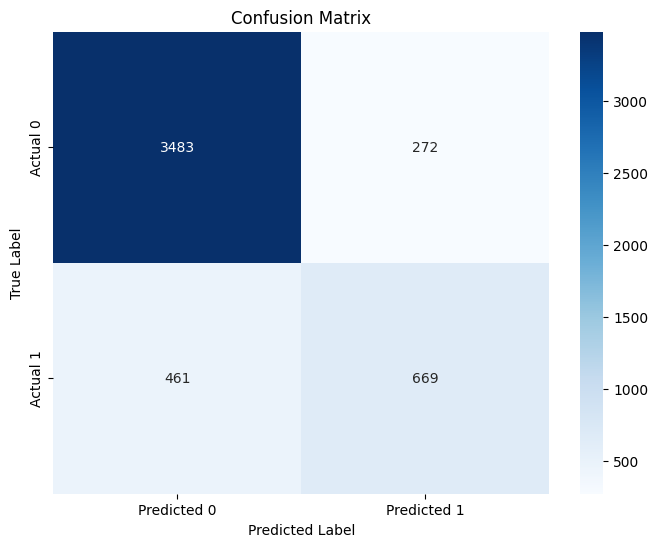

In [195]:
# prompt: calcul de l'accuracy du modeles et toutes ses performances

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns


# Calculer l'accuracy
accuracy = accuracy_score(y_test_cancer, y_pred_test)
print(f"Accuracy: {accuracy}")

# Calculer la precision
precision = precision_score(y_test_cancer, y_pred_test)
print(f"Precision: {precision}")

# Calculer le recall
recall = recall_score(y_test_cancer, y_pred_test)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_test_cancer, y_pred_test)
print(f"F1-score: {f1}")

# Calculer l'AUC (Area Under the Curve)
auc_grad = roc_auc_score(y_test_cancer, predictions_test) # Use probabilities for AUC
print(f"AUC: {auc_grad}")

# Matrice de confusion
cm = confusion_matrix(y_test_cancer, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Proximal_Gradient_descent**

Iteration 0: Loss = 0.69171677170239
Iteration 1: Loss = 0.6898970312382351
Iteration 2: Loss = 0.6882766403698907
Iteration 3: Loss = 0.6872394078490186
Iteration 4: Loss = 0.6862218952590725
Iteration 5: Loss = 0.6852167273788337
Iteration 6: Loss = 0.6842297402238774
Iteration 7: Loss = 0.6833943603806385
Iteration 8: Loss = 0.6827025304653952
Iteration 9: Loss = 0.6822213826475185
Iteration 10: Loss = 0.6817357986167867
Iteration 11: Loss = 0.6812595890378065
Iteration 12: Loss = 0.6807745360501716
Iteration 13: Loss = 0.680263491311233
Iteration 14: Loss = 0.6797439314821507
Iteration 15: Loss = 0.6792098554761358
Iteration 16: Loss = 0.6786697065926262
Iteration 17: Loss = 0.6781567029689072
Iteration 18: Loss = 0.6776475278907853
Iteration 19: Loss = 0.6771234080775806
Iteration 20: Loss = 0.6765867212637846
Iteration 21: Loss = 0.6760505807965007
Iteration 22: Loss = 0.675502435665502
Iteration 23: Loss = 0.6749535522301428
Iteration 24: Loss = 0.6744085910090449
Iteration 25: 

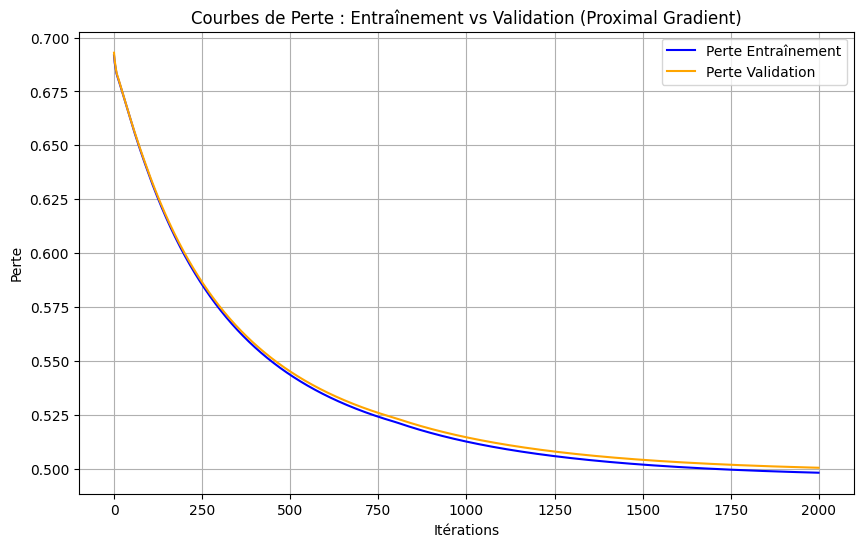

In [196]:
# Fonction de mise à jour avec soft thresholding pour régularisation L1
def soft_thresholding(weight, lambda_):
    return np.sign(weight) * max(abs(weight) - lambda_, 0)

# Proximal Gradient Descent
def proximal_gradient_descent(X, y, X_val, y_val, learning_rate=0.01, n_iter=2000, tolerance=1e-6, lambda_=0.1):
    weights = np.random.randn(X.shape[1]) * 0.01  # Initialisation des poids
    train_losses = []
    val_losses = []
    # Démarrer le chronomètre
    start_time = time.time()

    for _ in range(n_iter):
        # Calculer les prédictions
        predictions = 1 / (1 + np.exp(-X @ weights))

        # Calculer le gradient
        grad = -X.T @ (y - predictions) / len(y)

        # Mettre à jour les poids sans le soft thresholding d'abord
        new_weights = weights - learning_rate * grad

        # Appliquer la régularisation L1
        new_weights = np.array([soft_thresholding(w, learning_rate * lambda_) for w in new_weights])

        # Vérifier la convergence
        if np.linalg.norm(new_weights - weights) < tolerance:
            break

        weights = new_weights  # Mettre à jour les poids

        # Calculer et enregistrer la perte
        train_loss = logistic_loss(weights, X, y)
        val_loss = logistic_loss(weights, X_val, y_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        # Optionnel : calculer et afficher la perte
        loss = logistic_loss(weights, X, y)
        print(f"Iteration {_}: Loss = {loss}")  # Afficher la perte pour chaque itération
     # Arrêter le chronomètre
    end_time = time.time()
    convergence_time = end_time - start_time

    return weights, train_losses, val_losses,convergence_time

# Entraîner le modèle avec proximal gradient
trained_weights, train_losses, val_losses,convergence_time = proximal_gradient_descent(X_train_cancer_bias, y_train_cancer, X_val_cancer_bias, y_val_cancer)
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Perte Entraînement', color='blue')
plt.plot(val_losses, label='Perte Validation', color='orange')
plt.title('Courbes de Perte : Entraînement vs Validation (Proximal Gradient)')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [197]:
trained_weights_proxgrad, train_losses_proxgrad, test_losses_proxgrad, convergence_time_proxgrad = proximal_gradient_descent(X_train_cancer_bias, y_train_cancer, X_test_cancer_bias, y_test_cancer, learning_rate=0.01, n_iter=2000, tolerance=1e-6)
# Afficher les poids entraînés
#print("Poids entraînés :", trained_weights)

# Calculer et afficher la perte finale
final_loss_proxgrad = logistic_loss(trained_weights_proxgrad, X_test_cancer_bias, y_test_cancer)
print("Perte finale :", final_loss_proxgrad)

Iteration 0: Loss = 0.6937001757516162
Iteration 1: Loss = 0.6916814674078822
Iteration 2: Loss = 0.6899076898613734
Iteration 3: Loss = 0.6883471389797015
Iteration 4: Loss = 0.6870375447934757
Iteration 5: Loss = 0.6859444301171832
Iteration 6: Loss = 0.6849302422419997
Iteration 7: Loss = 0.6839890647479661
Iteration 8: Loss = 0.6832542117733558
Iteration 9: Loss = 0.6825440193992897
Iteration 10: Loss = 0.6818171437484664
Iteration 11: Loss = 0.6811136911025989
Iteration 12: Loss = 0.6804221636076888
Iteration 13: Loss = 0.6797494247555523
Iteration 14: Loss = 0.679112249193156
Iteration 15: Loss = 0.6784973165141704
Iteration 16: Loss = 0.6778598492379102
Iteration 17: Loss = 0.6772239160334415
Iteration 18: Loss = 0.6765980185620148
Iteration 19: Loss = 0.6759846695032127
Iteration 20: Loss = 0.6753815928757181
Iteration 21: Loss = 0.6748066594728569
Iteration 22: Loss = 0.6742474622048467
Iteration 23: Loss = 0.6736911181234668
Iteration 24: Loss = 0.6731376102176096
Iteration 2

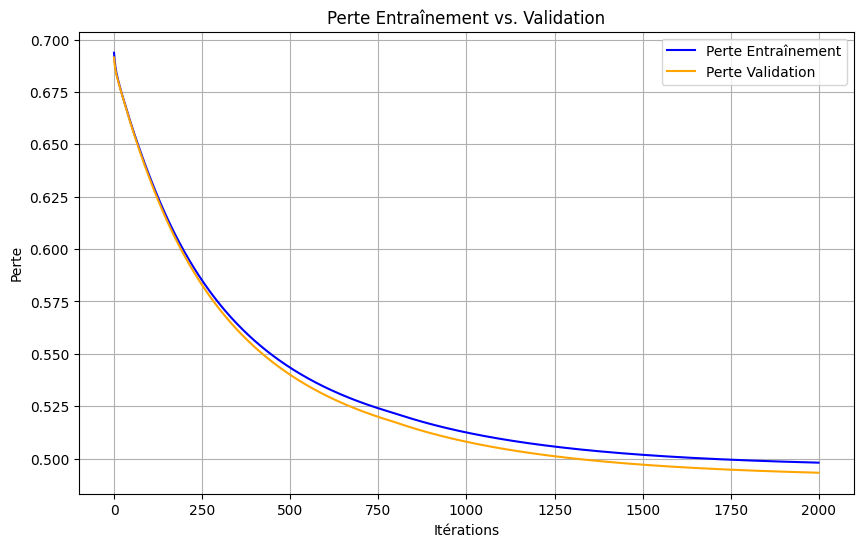

In [198]:
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses_proxgrad, label='Perte Entraînement', color='blue')
plt.plot(test_losses_proxgrad, label='Perte Validation', color='orange')
plt.title('Perte Entraînement vs. Validation')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [199]:
# prompt: calcul l'erreur de généralisation sur l'echantillon de test X_test_cancer_bias, y_test_cancer

# Calculer les prédictions sur l'ensemble de test
predictions_test = 1 / (1 + np.exp(-X_test_cancer_bias @ trained_weights_proxgrad))

# Convertir les probabilités en prédictions binaires (0 ou 1)
y_pred_test = (predictions_test >= 0.5).astype(int)

# Calculer l'erreur de généralisation (taux d'erreur)
generalization_error_proxgrad = np.mean(y_pred_test != y_test_cancer)

print(f"Erreur de généralisation sur l'ensemble de test : {generalization_error_proxgrad}")

Erreur de généralisation sur l'ensemble de test : 0.2053224155578301


Accuracy: 0.79467758444217
Precision: 0.7926267281105991
Recall: 0.15221238938053097
F1-score: 0.2553823311061618
AUC: 0.8472191650071291


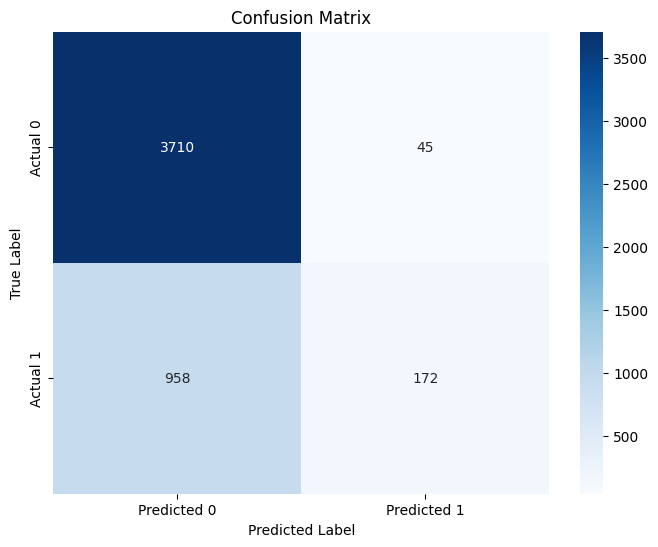

In [200]:
# prompt: calcul de l'accuracy du modeles et toutes ses performances

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns


# Calculer l'accuracy
accuracy = accuracy_score(y_test_cancer, y_pred_test)
print(f"Accuracy: {accuracy}")

# Calculer la precision
precision = precision_score(y_test_cancer, y_pred_test)
print(f"Precision: {precision}")

# Calculer le recall
recall = recall_score(y_test_cancer, y_pred_test)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_test_cancer, y_pred_test)
print(f"F1-score: {f1}")

# Calculer l'AUC (Area Under the Curve)
auc_proxgrad = roc_auc_score(y_test_cancer, predictions_test) # Use probabilities for AUC
print(f"AUC: {auc_proxgrad}")

# Matrice de confusion
cm = confusion_matrix(y_test_cancer, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Methode de Newton**

Iteration 0: Loss = 0.38888809851504064
Iteration 1: Loss = 0.6267411288867066
Iteration 2: Loss = 0.6426440261153886


<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-201-d31a4fc24465>:10: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))


Iteration 3: Loss = 3.319750408299757


<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-201-d31a4fc24465>:10: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))


Iteration 4: Loss = 7.780235802724726


<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-201-d31a4fc24465>:10: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))


Iteration 5: Loss = 16.227607588281234


<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités
<ipython-input-201-d31a4fc24465>:10: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))


Iteration 6: Loss = 17.036313400981502
Erreur dans l'inversion de la Hessienne, arrêt de l'optimisation.
Perte finale : 17.036313400981502


<ipython-input-187-16c15abb4cae>:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ weights))  # Calculer les probabilités


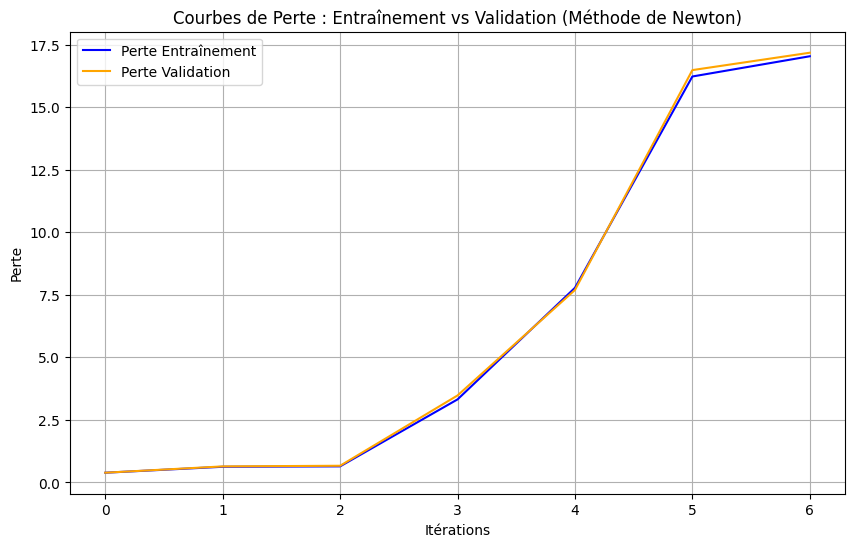

In [201]:
# Méthode de Newton
def newton_method(X, y, X_val, y_val, n_iter=150, tolerance=1e-6):
    weights = np.random.randn(X.shape[1]) * 0.01  # Initialisation des poids
    train_losses = []
    val_losses = []
    # Démarrer le chronomètre
    start_time = time.time()
    for _ in range(n_iter):
        # Calculer les prédictions
        predictions = 1 / (1 + np.exp(-X @ weights))

        # Calculer le gradient
        grad = -X.T @ (y - predictions) / len(y)

        # Calculer la Hessienne - Correction:
        # Create a diagonal matrix from predictions * (1 - predictions)
        # to ensure correct broadcasting during matrix multiplication
        S = np.diag(predictions * (1 - predictions))
        H = X.T @ S @ X / len(y)

        # Mettre à jour les poids
        try:
            weights -= np.linalg.solve(H, grad)  # Mise à jour par la méthode de Newton (using solve instead of inv)
        except np.linalg.LinAlgError:
            print("Erreur dans l'inversion de la Hessienne, arrêt de l'optimisation.")
            break

        # Vérifier la convergence
        if np.linalg.norm(grad) < tolerance:
            break

        # Calculer et enregistrer la perte
        train_loss = logistic_loss(weights, X, y)
        val_loss = logistic_loss(weights, X_val, y_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        # Optionnel : calculer et afficher la perte
        loss = logistic_loss(weights, X, y)
        print(f"Iteration {_}: Loss = {loss}")  # Afficher la perte pour chaque itération
    end_time = time.time()
    convergence_time = end_time - start_time
    return weights, train_losses, val_losses, convergence_time

# Entraîner le modèle avec la méthode de Newton
trained_weights, train_losses, val_losses, convergence_time = newton_method(X_train_cancer_bias, y_train_cancer, X_val_cancer_bias, y_val_cancer)
# Calculer et afficher la perte finale
final_loss = logistic_loss(trained_weights, X_train_cancer_bias, y_train_cancer)
print("Perte finale :", final_loss)
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Perte Entraînement', color='blue')
plt.plot(val_losses, label='Perte Validation', color='orange')
plt.title('Courbes de Perte : Entraînement vs Validation (Méthode de Newton)')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [202]:
trained_weights_newton, train_losses_newton, test_losses_newton, convergence_time_newton = newton_method(X_train_cancer_bias, y_train_cancer, X_test_cancer_bias, y_test_cancer)
# Afficher les poids entraînés
#print("Poids entraînés :", trained_weights)

# Calculer et afficher la perte finale
final_loss_newton = logistic_loss(trained_weights_newton, X_test_cancer_bias, y_test_cancer)
print("Perte finale :", final_loss_newton)
print(convergence_time_newton)

Iteration 0: Loss = 0.3889275637146202
Iteration 1: Loss = 0.33776903000915065
Iteration 2: Loss = 0.31992307592480174
Iteration 3: Loss = 0.31663369788070284
Iteration 4: Loss = 0.3163755370696486
Iteration 5: Loss = 0.31636520949228036
Iteration 6: Loss = 0.31636405726336164
Iteration 7: Loss = 0.31636365232269476
Iteration 8: Loss = 0.3163635034982884
Iteration 9: Loss = 0.31636344876824174
Perte finale : 0.3207791938965633
54.5072968006134


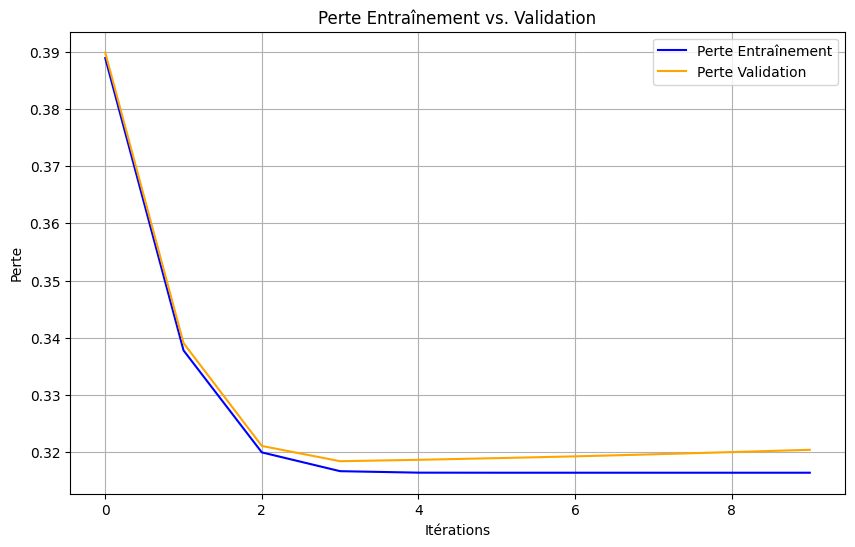

In [203]:
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses_newton, label='Perte Entraînement', color='blue')
plt.plot(test_losses_newton, label='Perte Validation', color='orange')
plt.title('Perte Entraînement vs. Validation')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [204]:
# prompt: calcul l'erreur de généralisation sur l'echantillon de test X_test_cancer_bias, y_test_cancer

# Calculer les prédictions sur l'ensemble de test
predictions_test = 1 / (1 + np.exp(-X_test_cancer_bias @ trained_weights_newton))

# Convertir les probabilités en prédictions binaires (0 ou 1)
y_pred_test = (predictions_test >= 0.5).astype(int)

# Calculer l'erreur de généralisation (taux d'erreur)
generalization_error_newton = np.mean(y_pred_test != y_test_cancer)

print(f"Erreur de généralisation sur l'ensemble de test : {generalization_error_newton}")

Erreur de généralisation sur l'ensemble de test : 0.14554759467758444


Accuracy: 0.8544524053224155
Precision: 0.7255113024757804
Recall: 0.5964601769911504
F1-score: 0.6546867411364741
AUC: 0.90126604055949


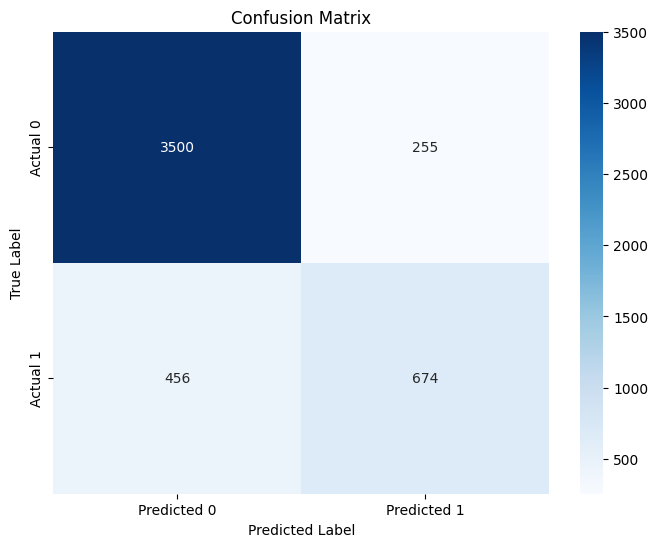

In [205]:
# prompt: calcul de l'accuracy du modeles et toutes ses performances

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns


# Calculer l'accuracy
accuracy = accuracy_score(y_test_cancer, y_pred_test)
print(f"Accuracy: {accuracy}")

# Calculer la precision
precision = precision_score(y_test_cancer, y_pred_test)
print(f"Precision: {precision}")

# Calculer le recall
recall = recall_score(y_test_cancer, y_pred_test)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_test_cancer, y_pred_test)
print(f"F1-score: {f1}")

# Calculer l'AUC (Area Under the Curve)
auc_newton = roc_auc_score(y_test_cancer, predictions_test) # Use probabilities for AUC
print(f"AUC: {auc_newton}")

# Matrice de confusion
cm = confusion_matrix(y_test_cancer, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**# Méthode de Nesterov Accelerated Gradient**

Iteration 0: Loss = 0.6925089879745607
Iteration 1: Loss = 0.6878775683228553
Iteration 2: Loss = 0.6814173442741471
Iteration 3: Loss = 0.6734541618595545
Iteration 4: Loss = 0.6643013281921574
Iteration 5: Loss = 0.6542517974305849
Iteration 6: Loss = 0.6435725241020245
Iteration 7: Loss = 0.6325007632263371
Iteration 8: Loss = 0.6212421056048365
Iteration 9: Loss = 0.609970026673642
Iteration 10: Loss = 0.5988267075187494
Iteration 11: Loss = 0.587924867751346
Iteration 12: Loss = 0.5773503410101678
Iteration 13: Loss = 0.5671651301144602
Iteration 14: Loss = 0.5574107011036973
Iteration 15: Loss = 0.5481113106370292
Iteration 16: Loss = 0.5392772043981446
Iteration 17: Loss = 0.5309075696687529
Iteration 18: Loss = 0.52299316827495
Iteration 19: Loss = 0.5155186133122258
Iteration 20: Loss = 0.5084642826583087
Iteration 21: Loss = 0.501807883911339
Iteration 22: Loss = 0.49552569965058085
Iteration 23: Loss = 0.4895935499793708
Iteration 24: Loss = 0.48398751256195116
Iteration 25:

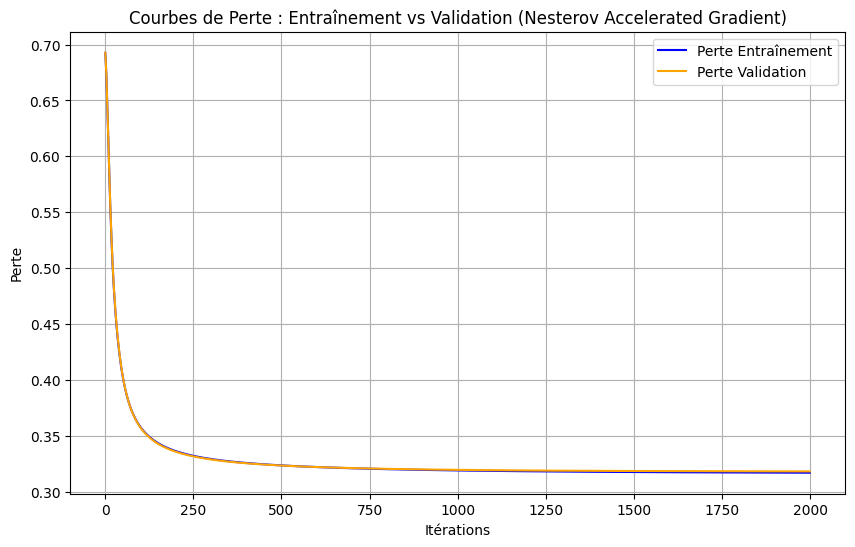

In [206]:

# Méthode de Nesterov Accelerated Gradient
def nesterov_accelerated_gradient(X, y, X_val, y_val, learning_rate=0.01, n_iter=2000, momentum=0.9, tolerance=1e-6):
    weights = np.random.randn(X.shape[1]) * 0.01  # Initialisation des poids
    velocity = np.zeros_like(weights)  # Initialisation de la vitesse
    train_losses = []
    val_losses = []
    # Démarrer le chronomètre
    start_time = time.time()
    for _ in range(n_iter):
        # Calculer les prédictions avec le poids "prévu"
        weights_temp = weights + momentum * velocity

        predictions = 1 / (1 + np.exp(-X @ weights_temp))

        # Calculer le gradient
        grad = -X.T @ (y - predictions) / len(y)

        # Mettre à jour la vitesse
        velocity = momentum * velocity - learning_rate * grad

        # Mettre à jour les poids
        weights += velocity

        # Vérifier la convergence
        if np.linalg.norm(grad) < tolerance:
            break

        # Calculer et enregistrer la perte
        train_loss = logistic_loss(weights, X, y)
        val_loss = logistic_loss(weights, X_val, y_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        # Optionnel : calculer et afficher la perte
        loss = logistic_loss(weights, X, y)
        print(f"Iteration {_}: Loss = {loss}")  # Afficher la perte pour chaque itération

    end_time = time.time()
    convergence_time = end_time - start_time
    return weights, train_losses, val_losses,convergence_time

# Entraîner le modèle avec NAG
trained_weights, train_losses, val_losses, convergence_time = nesterov_accelerated_gradient(X_train_cancer_bias, y_train_cancer, X_val_cancer_bias, y_val_cancer)
# Calculer et afficher la perte finale
final_loss = logistic_loss(trained_weights, X_train_cancer_bias, y_train_cancer)
print("Perte finale :", final_loss)
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Perte Entraînement', color='blue')
plt.plot(val_losses, label='Perte Validation', color='orange')
plt.title('Courbes de Perte : Entraînement vs Validation (Nesterov Accelerated Gradient)')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()


In [207]:
trained_weights_NAG, train_losses_NAG, test_losses_NAG, convergence_time_NAG = nesterov_accelerated_gradient(X_train_cancer_bias, y_train_cancer, X_test_cancer_bias, y_test_cancer)
# Afficher les poids entraînés
#print("Poids entraînés :", trained_weights)

# Calculer et afficher la perte finale
final_loss_NAG = logistic_loss(trained_weights_NAG, X_test_cancer_bias, y_test_cancer)
print("Perte finale :", final_loss_NAG)

Iteration 0: Loss = 0.6928607611589298
Iteration 1: Loss = 0.6882076058456142
Iteration 2: Loss = 0.6817174039334096
Iteration 3: Loss = 0.673717818163739
Iteration 4: Loss = 0.6645239131540731
Iteration 5: Loss = 0.6544302776138932
Iteration 6: Loss = 0.6437053319488557
Iteration 7: Loss = 0.6325875994385652
Iteration 8: Loss = 0.6212837279234235
Iteration 9: Loss = 0.609968038565998
Iteration 10: Loss = 0.5987833578890571
Iteration 11: Loss = 0.5878428698744387
Iteration 12: Loss = 0.5772327157141337
Iteration 13: Loss = 0.5670150751905435
Iteration 14: Loss = 0.5572314863822228
Iteration 15: Loss = 0.547906196377371
Iteration 16: Loss = 0.5390493796546934
Iteration 17: Loss = 0.5306601070071681
Iteration 18: Loss = 0.5227289914249684
Iteration 19: Loss = 0.5152404748375389
Iteration 20: Loss = 0.5081747493170652
Iteration 21: Loss = 0.5015093279468019
Iteration 22: Loss = 0.4952202947227023
Iteration 23: Loss = 0.4892832708024436
Iteration 24: Loss = 0.4836741375581138
Iteration 25:

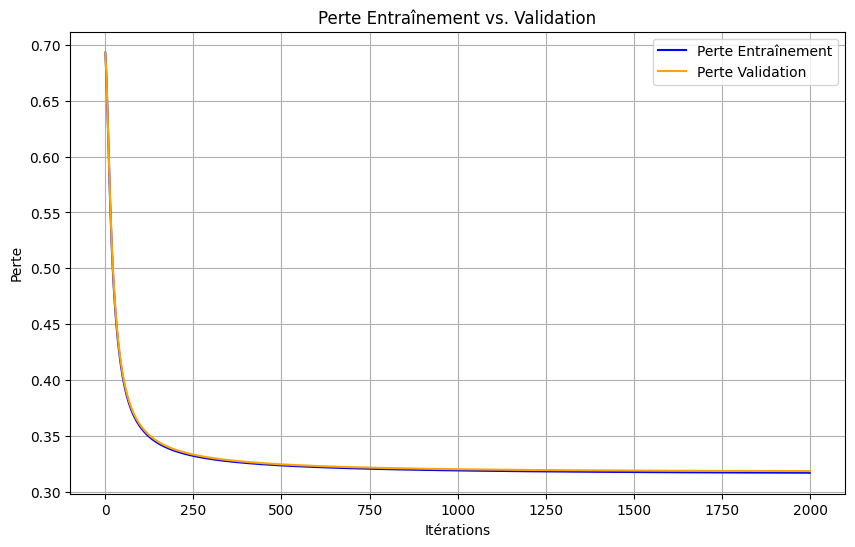

In [208]:
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses_NAG, label='Perte Entraînement', color='blue')
plt.plot(test_losses_NAG, label='Perte Validation', color='orange')
plt.title('Perte Entraînement vs. Validation')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [209]:
# prompt: calcul l'erreur de généralisation sur l'echantillon de test X_test_cancer_bias, y_test_cancer

# Calculer les prédictions sur l'ensemble de test
predictions_test = 1 / (1 + np.exp(-X_test_cancer_bias @ trained_weights_NAG))

# Convertir les probabilités en prédictions binaires (0 ou 1)
y_pred_test = (predictions_test >= 0.5).astype(int)

# Calculer l'erreur de généralisation (taux d'erreur)
generalization_error_NAG = np.mean(y_pred_test != y_test_cancer)

print(f"Erreur de généralisation sur l'ensemble de test : {generalization_error_NAG}")

Erreur de généralisation sur l'ensemble de test : 0.14411463664278404


Accuracy: 0.855885363357216
Precision: 0.7310195227765727
Recall: 0.5964601769911504
F1-score: 0.6569200779727096
AUC: 0.9026619374756962


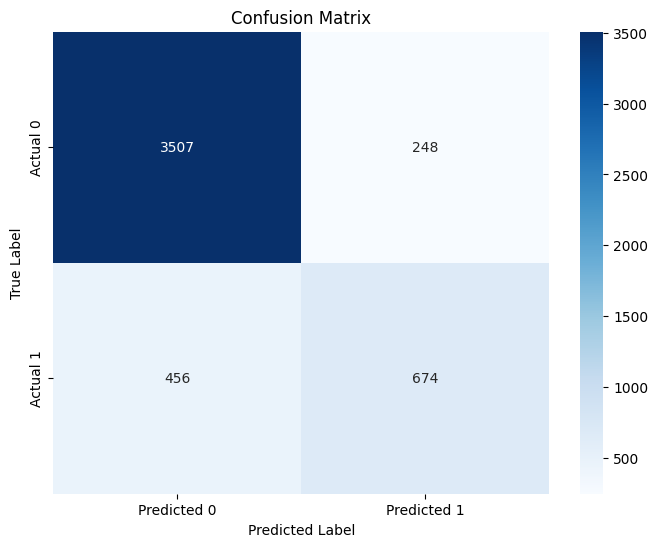

In [210]:
# prompt: calcul de l'accuracy du modeles et toutes ses performances

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns

# Calculer l'accuracy
auc_NAG = accuracy_score(y_test_cancer, y_pred_test)
print(f"Accuracy: {auc_NAG}")

# Calculer la precision
precision = precision_score(y_test_cancer, y_pred_test)
print(f"Precision: {precision}")

# Calculer le recall
recall = recall_score(y_test_cancer, y_pred_test)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_test_cancer, y_pred_test)
print(f"F1-score: {f1}")

# Calculer l'AUC (Area Under the Curve)
auc_NAG = roc_auc_score(y_test_cancer, predictions_test) # Use probabilities for AUC
print(f"AUC: {auc_NAG}")

# Matrice de confusion
cm = confusion_matrix(y_test_cancer, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Méthode ADAM**

Iteration 47.444732904434204: Loss = 0.6928503469117396
Iteration 47.444732904434204: Loss = 0.6903805942839114
Iteration 47.444732904434204: Loss = 0.6879485989680028
Iteration 47.444732904434204: Loss = 0.6855546411490336
Iteration 47.444732904434204: Loss = 0.6831987637323554
Iteration 47.444732904434204: Loss = 0.6808807431472075
Iteration 47.444732904434204: Loss = 0.6786002200315095
Iteration 47.444732904434204: Loss = 0.6763567971480109
Iteration 47.444732904434204: Loss = 0.6741500809006377
Iteration 47.444732904434204: Loss = 0.6719796739532519
Iteration 47.444732904434204: Loss = 0.6698451491616941
Iteration 47.444732904434204: Loss = 0.6677460131906874
Iteration 47.444732904434204: Loss = 0.6656816877364645
Iteration 47.444732904434204: Loss = 0.66365152408568
Iteration 47.444732904434204: Loss = 0.6616548357147923
Iteration 47.444732904434204: Loss = 0.6596909139451892
Iteration 47.444732904434204: Loss = 0.6577590234192747
Iteration 47.444732904434204: Loss = 0.65585840012

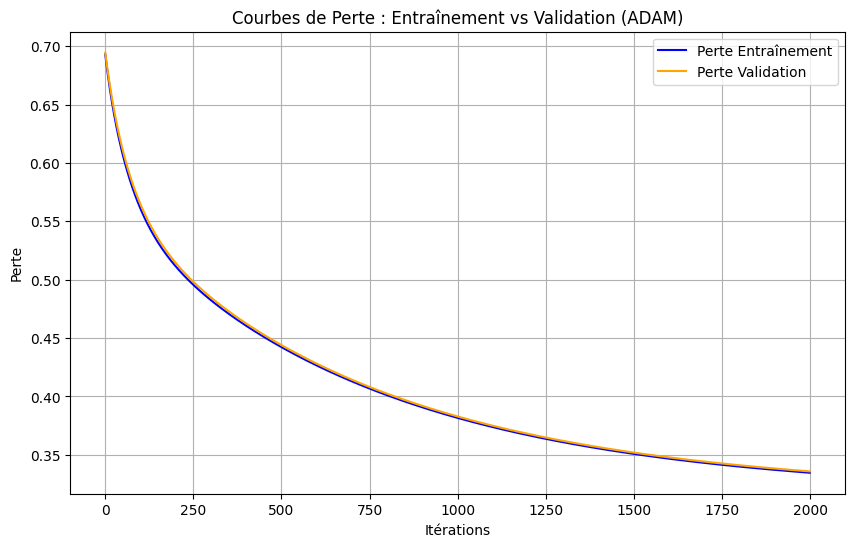

In [211]:
# Méthode ADAM
def adam_optimizer(X, y, X_val, y_val, learning_rate=0.001, n_iter=2000, beta1=0.9, beta2=0.999, tolerance=1e-6):
    weights = np.random.randn(X.shape[1]) * 0.01  # Initialisation des poids
    m = np.zeros_like(weights)  # Premier moment (moyenne des gradients)
    v = np.zeros_like(weights)  # Deuxième moment (moyenne des carrés des gradients)
    train_losses = []
    val_losses = []
    epsilon = 1e-8  # Pour éviter la division par zéro
     # Démarrer le chronomètre
    start_time = time.time()
    for t in range(1, n_iter + 1):
        # Calculer les prédictions
        predictions = 1 / (1 + np.exp(-X @ weights))

        # Calculer le gradient
        grad = -X.T @ (y - predictions) / len(y)

        # Mettre à jour les moments
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)

        # Correction du biais
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        # Mise à jour des poids
        weights -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        # Vérifier la convergence
        if np.linalg.norm(grad) < tolerance:
            break

        # Calculer et enregistrer la perte
        train_loss = logistic_loss(weights, X, y)
        val_loss = logistic_loss(weights, X_val, y_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        # Optionnel : calculer et afficher la perte
        loss = logistic_loss(weights, X, y)
        print(f"Iteration {_}: Loss = {loss}")  # Afficher la perte pour chaque itération


    end_time = time.time()
    convergence_time = end_time - start_time
    return weights, train_losses, val_losses,convergence_time

# Entraîner le modèle avec ADAM
trained_weights, train_losses, val_losses, convergence_time = adam_optimizer(X_train_cancer_bias, y_train_cancer, X_val_cancer_bias, y_val_cancer)
# Calculer et afficher la perte finale
final_loss = logistic_loss(trained_weights, X_train_cancer_bias, y_train_cancer)
print("Perte finale :", final_loss)
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Perte Entraînement', color='blue')
plt.plot(val_losses, label='Perte Validation', color='orange')
plt.title('Courbes de Perte : Entraînement vs Validation (ADAM)')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [212]:
trained_weights_adam, train_losses_adam, test_losses_adam,convergence_time_adam = adam_optimizer(X_train_cancer_bias, y_train_cancer, X_test_cancer_bias, y_test_cancer)
# Afficher les poids entraînés
#print("Poids entraînés :", trained_weights)

# Calculer et afficher la perte finale
final_loss_adam = logistic_loss(trained_weights_adam, X_test_cancer_bias, y_test_cancer)
print("Perte finale :", final_loss_adam)

Iteration 47.444732904434204: Loss = 0.6846019297192275
Iteration 47.444732904434204: Loss = 0.6821700661473028
Iteration 47.444732904434204: Loss = 0.6797758486198442
Iteration 47.444732904434204: Loss = 0.6774194871933149
Iteration 47.444732904434204: Loss = 0.6751009032133093
Iteration 47.444732904434204: Loss = 0.6728199704490593
Iteration 47.444732904434204: Loss = 0.6705765535987065
Iteration 47.444732904434204: Loss = 0.668370390459657
Iteration 47.444732904434204: Loss = 0.6662010501160928
Iteration 47.444732904434204: Loss = 0.6640679818325984
Iteration 47.444732904434204: Loss = 0.6619705847362317
Iteration 47.444732904434204: Loss = 0.6599082292482636
Iteration 47.444732904434204: Loss = 0.6578802540969824
Iteration 47.444732904434204: Loss = 0.6558859815605641
Iteration 47.444732904434204: Loss = 0.653924747596322
Iteration 47.444732904434204: Loss = 0.651995908780457
Iteration 47.444732904434204: Loss = 0.6500988201294312
Iteration 47.444732904434204: Loss = 0.648232812125

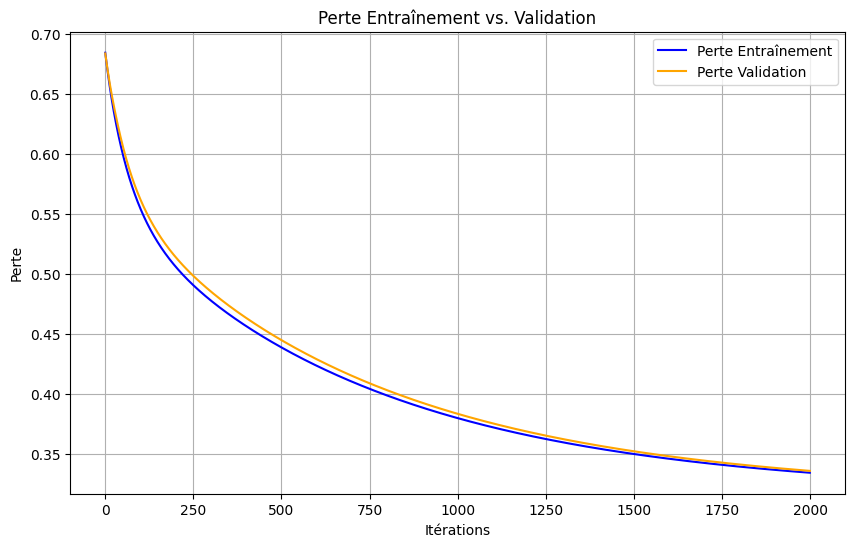

In [213]:
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses_adam, label='Perte Entraînement', color='blue')
plt.plot(test_losses_adam, label='Perte Validation', color='orange')
plt.title('Perte Entraînement vs. Validation')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

Accuracy: 0.8526100307062436
Precision: 0.6959847036328872
Recall: 0.6442477876106195
F1-score: 0.6691176470588235
AUC: 0.9020951415811367


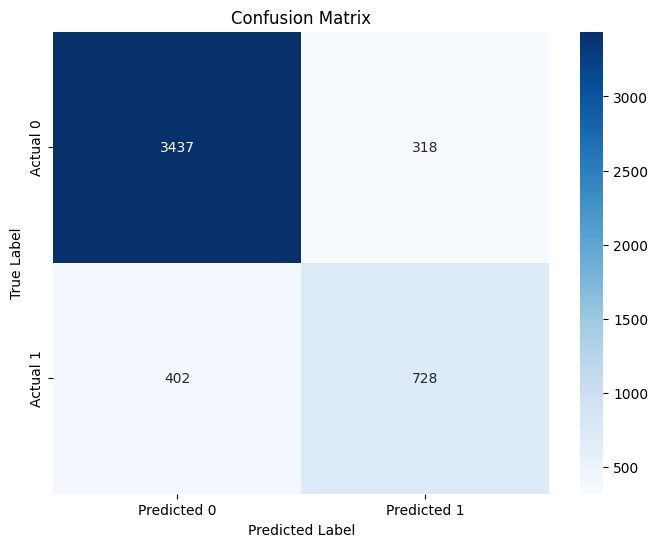

In [214]:
# prompt: calcul de l'accuracy du modeles et toutes ses performances

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
# Calculer les prédictions sur l'ensemble de test
predictions_test = 1 / (1 + np.exp(-X_test_cancer_bias @ trained_weights_adam))

# Convertir les probabilités en prédictions binaires (0 ou 1)
y_pred_test = (predictions_test >= 0.5).astype(int)

# Calculer l'accuracy
auc_adam = accuracy_score(y_test_cancer, y_pred_test)
print(f"Accuracy: {auc_adam}")

# Calculer la precision
precision = precision_score(y_test_cancer, y_pred_test)
print(f"Precision: {precision}")

# Calculer le recall
recall = recall_score(y_test_cancer, y_pred_test)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_test_cancer, y_pred_test)
print(f"F1-score: {f1}")

# Calculer l'AUC (Area Under the Curve)
auc_adam = roc_auc_score(y_test_cancer, predictions_test) # Use probabilities for AUC
print(f"AUC: {auc_adam}")

# Matrice de confusion
cm = confusion_matrix(y_test_cancer, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [215]:


# Calculer l'erreur de généralisation (taux d'erreur)
generalization_error_adam = np.mean(y_pred_test != y_test_cancer)

print(f"Erreur de généralisation sur l'ensemble de test : {generalization_error_adam}")

Erreur de généralisation sur l'ensemble de test : 0.1473899692937564


# **Méthode RMSprop**

Iteration 0: Loss = 0.6792705124581297
Iteration 1: Loss = 0.6739527415129264
Iteration 2: Loss = 0.6696833044412789
Iteration 3: Loss = 0.6660192382225072
Iteration 4: Loss = 0.6627577592789892
Iteration 5: Loss = 0.6597868127890352
Iteration 6: Loss = 0.657037101844614
Iteration 7: Loss = 0.6544624094717721
Iteration 8: Loss = 0.652030186798559
Iteration 9: Loss = 0.6497165482383792
Iteration 10: Loss = 0.647503393611506
Iteration 11: Loss = 0.6453766498088832
Iteration 12: Loss = 0.6433251429847708
Iteration 13: Loss = 0.6413398458122844
Iteration 14: Loss = 0.6394133581059201
Iteration 15: Loss = 0.6375395381718614
Iteration 16: Loss = 0.6357132345978822
Iteration 17: Loss = 0.6339300867743002
Iteration 18: Loss = 0.6321863735714507
Iteration 19: Loss = 0.6304788965246649
Iteration 20: Loss = 0.6288048883114375
Iteration 21: Loss = 0.6271619401920454
Iteration 22: Loss = 0.6255479439729678
Iteration 23: Loss = 0.6239610452839988
Iteration 24: Loss = 0.6223996057621999
Iteration 25:

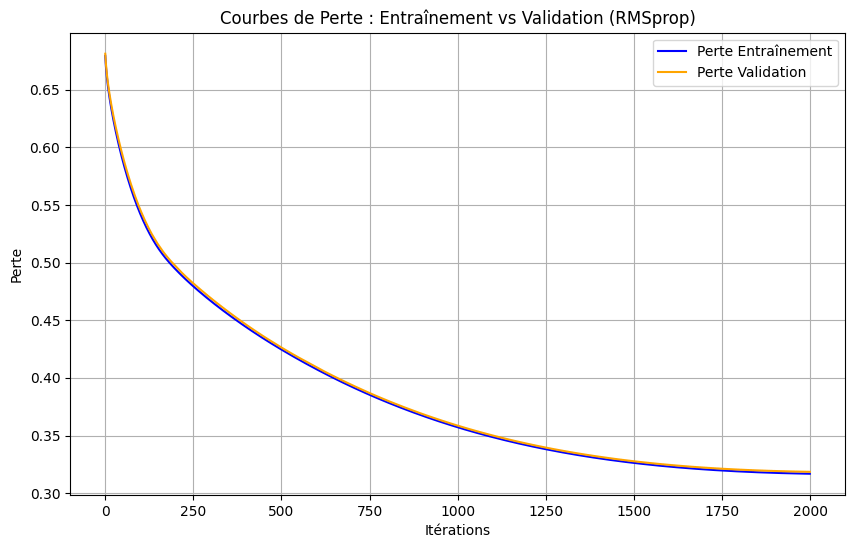

In [216]:
# Méthode RMSprop
def rmsprop_optimizer(X, y, X_val, y_val, learning_rate=0.001, n_iter=2000, decay_rate=0.9, epsilon=1e-8, tolerance=1e-6):
    weights = np.random.randn(X.shape[1]) * 0.01  # Initialisation des poids
    avg_squared_grad = np.zeros_like(weights)  # Moyenne des carrés des gradients
    train_losses = []
    val_losses = []
     # Démarrer le chronomètre
    start_time = time.time()

    for _ in range(n_iter):
        # Calculer les prédictions
        predictions = 1 / (1 + np.exp(-X @ weights))

        # Calculer le gradient
        grad = -X.T @ (y - predictions) / len(y)

        # Mettre à jour la moyenne des carrés des gradients
        avg_squared_grad = decay_rate * avg_squared_grad + (1 - decay_rate) * (grad ** 2)

        # Mise à jour des poids
        weights -= learning_rate * grad / (np.sqrt(avg_squared_grad) + epsilon)

        # Vérifier la convergence
        if np.linalg.norm(grad) < tolerance:
            break

        # Calculer et enregistrer la perte
        train_loss = logistic_loss(weights, X, y)
        val_loss = logistic_loss(weights, X_val, y_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
         # Optionnel : calculer et afficher la perte
        loss = logistic_loss(weights, X, y)
        print(f"Iteration {_}: Loss = {loss}")  # Afficher la perte pour chaque itération


    end_time = time.time()
    convergence_time = end_time - start_time
    return weights, train_losses, val_losses,convergence_time

# Entraîner le modèle avec RMSprop
trained_weights, train_losses, val_losses, convergence_time = rmsprop_optimizer(X_train_cancer_bias, y_train_cancer, X_val_cancer_bias, y_val_cancer)
# Calculer et afficher la perte finale
final_loss = logistic_loss(trained_weights, X_train_cancer_bias, y_train_cancer)
print("Perte finale :", final_loss)
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Perte Entraînement', color='blue')
plt.plot(val_losses, label='Perte Validation', color='orange')
plt.title('Courbes de Perte : Entraînement vs Validation (RMSprop)')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [217]:
trained_weights_rmsprop, train_losses_rmsprop, test_losses_rmsprop, convergence_time_rmsprop = rmsprop_optimizer(X_train_cancer_bias, y_train_cancer, X_test_cancer_bias, y_test_cancer)
# Afficher les poids entraînés
#print("Poids entraînés :", trained_weights)

# Calculer et afficher la perte finale
final_loss_rmsprop = logistic_loss(trained_weights_rmsprop, X_test_cancer_bias, y_test_cancer)
print("Perte finale :", final_loss_rmsprop)

Iteration 0: Loss = 0.6845401977222056
Iteration 1: Loss = 0.6792632292752689
Iteration 2: Loss = 0.6750217738143903
Iteration 3: Loss = 0.6713773661327886
Iteration 4: Loss = 0.6681297731841838
Iteration 5: Loss = 0.6651686621574308
Iteration 6: Loss = 0.6624259185732959
Iteration 7: Loss = 0.6598561463557939
Iteration 8: Loss = 0.657427380267803
Iteration 9: Loss = 0.6551161630315161
Iteration 10: Loss = 0.6529047168585204
Iteration 11: Loss = 0.6507792160931248
Iteration 12: Loss = 0.6487286784020008
Iteration 13: Loss = 0.6467442250321715
Iteration 14: Loss = 0.644818569760959
Iteration 15: Loss = 0.6429456573546889
Iteration 16: Loss = 0.6411204009623308
Iteration 17: Loss = 0.6393384941467989
Iteration 18: Loss = 0.6375962697776438
Iteration 19: Loss = 0.6358905431711173
Iteration 20: Loss = 0.6342183987026394
Iteration 21: Loss = 0.6325775546939385
Iteration 22: Loss = 0.6309659518332345
Iteration 23: Loss = 0.6293817347755779
Iteration 24: Loss = 0.6278232631136909
Iteration 25

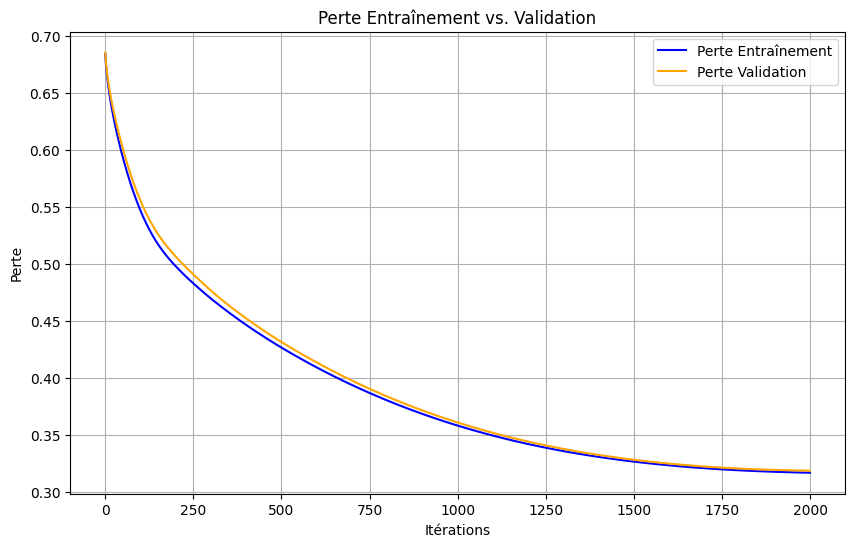

In [218]:
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses_rmsprop, label='Perte Entraînement', color='blue')
plt.plot(test_losses_rmsprop, label='Perte Validation', color='orange')
plt.title('Perte Entraînement vs. Validation')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

Accuracy: 0.8554759467758444
Precision: 0.7250530785562632
Recall: 0.6044247787610619
F1-score: 0.6592664092664092
AUC: 0.9029265993424697


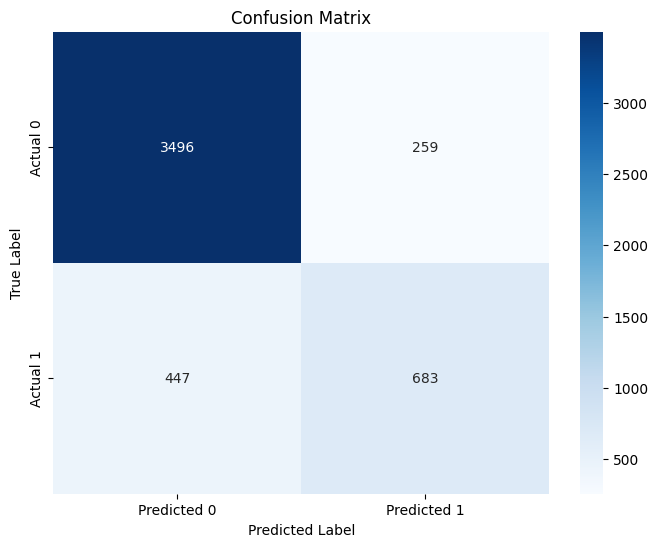

In [219]:
# prompt: calcul de l'accuracy du modeles et toutes ses performances

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
# Calculer les prédictions sur l'ensemble de test
predictions_test = 1 / (1 + np.exp(-X_test_cancer_bias @ trained_weights_rmsprop))

# Convertir les probabilités en prédictions binaires (0 ou 1)
y_pred_test = (predictions_test >= 0.5).astype(int)

# Calculer l'accuracy
auc_rmsprop = accuracy_score(y_test_cancer, y_pred_test)
print(f"Accuracy: {auc_rmsprop}")

# Calculer la precision
precision = precision_score(y_test_cancer, y_pred_test)
print(f"Precision: {precision}")

# Calculer le recall
recall = recall_score(y_test_cancer, y_pred_test)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_test_cancer, y_pred_test)
print(f"F1-score: {f1}")

# Calculer l'AUC (Area Under the Curve)
auc = roc_auc_score(y_test_cancer, predictions_test) # Use probabilities for AUC
print(f"AUC: {auc}")

# Matrice de confusion
cm = confusion_matrix(y_test_cancer, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [220]:


# Calculer l'erreur de généralisation (taux d'erreur)
generalization_error_rmsprop = np.mean(y_pred_test != y_test_cancer)

print(f"Erreur de généralisation sur l'ensemble de test : {generalization_error_rmsprop}")

Erreur de généralisation sur l'ensemble de test : 0.14452405322415557


# **Méthode AdaGrad**

Iteration 0: Loss = 0.5959926289575405
Iteration 1: Loss = 0.5264384479454021
Iteration 2: Loss = 0.5052224304227907
Iteration 3: Loss = 0.491008382988703
Iteration 4: Loss = 0.4798602401523968
Iteration 5: Loss = 0.470382381924709
Iteration 6: Loss = 0.46208493256447397
Iteration 7: Loss = 0.454891088684953
Iteration 8: Loss = 0.44860306146364043
Iteration 9: Loss = 0.44298331568952337
Iteration 10: Loss = 0.4378786381098285
Iteration 11: Loss = 0.4332103166208582
Iteration 12: Loss = 0.4289028664698593
Iteration 13: Loss = 0.4249131839335784
Iteration 14: Loss = 0.4211972844959659
Iteration 15: Loss = 0.41772582995361657
Iteration 16: Loss = 0.4144707076264484
Iteration 17: Loss = 0.4114106874725687
Iteration 18: Loss = 0.4085263065720777
Iteration 19: Loss = 0.4058016426566958
Iteration 20: Loss = 0.40322244455204165
Iteration 21: Loss = 0.40077648111335173
Iteration 22: Loss = 0.3984528814075736
Iteration 23: Loss = 0.39624207048934024
Iteration 24: Loss = 0.39413551021539567
Itera

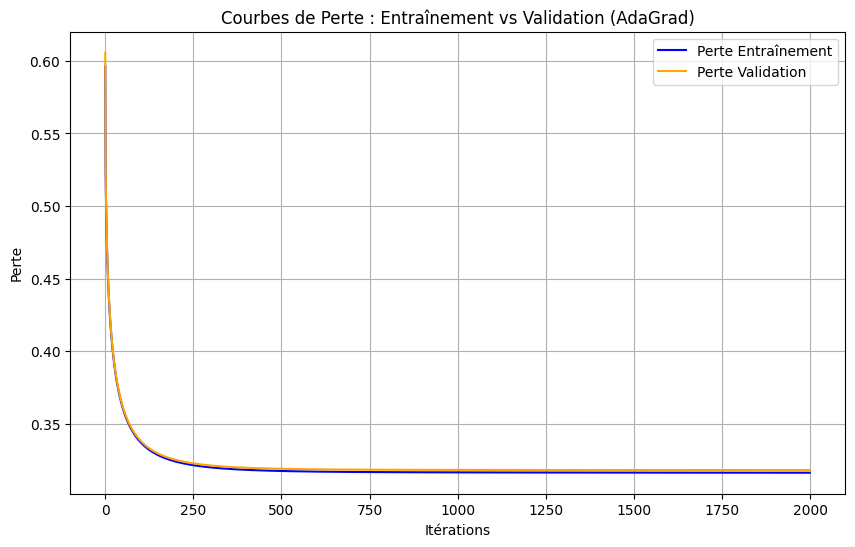

In [221]:


# Méthode AdaGrad
def adagrad_optimizer(X, y, X_val, y_val, learning_rate=0.1, n_iter=2000, epsilon=1e-8, tolerance=1e-6):
    weights = np.random.randn(X.shape[1]) * 0.01  # Initialisation des poids
    accumulated_grad_squared = np.zeros_like(weights)  # Somme des carrés des gradients
    train_losses = []
    val_losses = []
    # Démarrer le chronomètre
    start_time = time.time()

    for _ in range(n_iter):
        # Calculer les prédictions
        predictions = 1 / (1 + np.exp(-X @ weights))

        # Calculer le gradient
        grad = -X.T @ (y - predictions) / len(y)

        # Mettre à jour la somme des carrés des gradients
        accumulated_grad_squared += grad ** 2

        # Mise à jour des poids
        weights -= (learning_rate * grad) / (np.sqrt(accumulated_grad_squared) + epsilon)

        # Vérifier la convergence
        if np.linalg.norm(grad) < tolerance:
            break

        # Calculer et enregistrer la perte
        train_loss = logistic_loss(weights, X, y)
        val_loss = logistic_loss(weights, X_val, y_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        # Optionnel : calculer et afficher la perte
        loss = logistic_loss(weights, X, y)
        print(f"Iteration {_}: Loss = {loss}")  # Afficher la perte pour chaque itération


    end_time = time.time()
    convergence_time = end_time - start_time
    return weights, train_losses, val_losses,convergence_time

# Entraîner le modèle avec AdaGrad
trained_weights, train_losses, val_losses, convergence_time = adagrad_optimizer(X_train_cancer_bias, y_train_cancer, X_val_cancer_bias, y_val_cancer)
# Calculer et afficher la perte finale
final_loss = logistic_loss(trained_weights, X_train_cancer_bias, y_train_cancer)
print("Perte finale :", final_loss)
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Perte Entraînement', color='blue')
plt.plot(val_losses, label='Perte Validation', color='orange')
plt.title('Courbes de Perte : Entraînement vs Validation (AdaGrad)')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [222]:
trained_weights_adagrad, train_losses_adagrad, test_losses_adagrad, convergence_time_adagrad = adagrad_optimizer(X_train_cancer_bias, y_train_cancer, X_test_cancer_bias, y_test_cancer)
# Afficher les poids entraînés
#print("Poids entraînés :", trained_weights)

# Calculer et afficher la perte finale
final_loss_adagrad = logistic_loss(trained_weights_adagrad, X_test_cancer_bias, y_test_cancer)
print("Perte finale :", final_loss_adagrad)

Iteration 0: Loss = 0.5898757956165879
Iteration 1: Loss = 0.5216331652474613
Iteration 2: Loss = 0.5016350676808873
Iteration 3: Loss = 0.48782234303886185
Iteration 4: Loss = 0.47714452934724105
Iteration 5: Loss = 0.4682218897802234
Iteration 6: Loss = 0.4603622397453393
Iteration 7: Loss = 0.4534712546851147
Iteration 8: Loss = 0.44726680708288447
Iteration 9: Loss = 0.4416799253748193
Iteration 10: Loss = 0.4366078111768917
Iteration 11: Loss = 0.43196973106787956
Iteration 12: Loss = 0.42769793821803337
Iteration 13: Loss = 0.4237420176672758
Iteration 14: Loss = 0.4200603290553575
Iteration 15: Loss = 0.4166210730668443
Iteration 16: Loss = 0.41339594663879337
Iteration 17: Loss = 0.41036487373023117
Iteration 18: Loss = 0.40750639146287
Iteration 19: Loss = 0.4048072786326589
Iteration 20: Loss = 0.4022513501434636
Iteration 21: Loss = 0.3998281787364543
Iteration 22: Loss = 0.39752581711543716
Iteration 23: Loss = 0.3953356287543551
Iteration 24: Loss = 0.39324861137449324
Ite

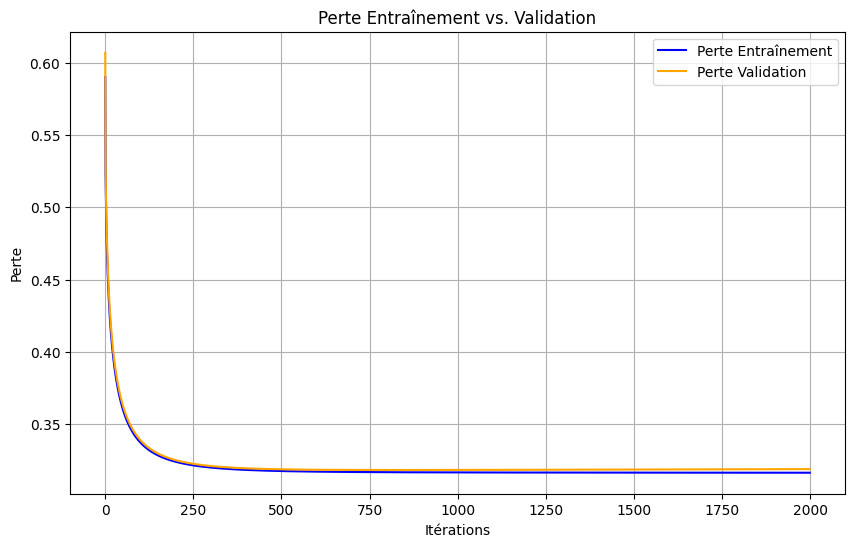

In [223]:
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses_adagrad, label='Perte Entraînement', color='blue')
plt.plot(test_losses_adagrad, label='Perte Validation', color='orange')
plt.title('Perte Entraînement vs. Validation')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

Accuracy: 0.8546571136131014
Precision: 0.7258064516129032
Recall: 0.5973451327433629
F1-score: 0.6553398058252428
AUC: 0.9024234354194407


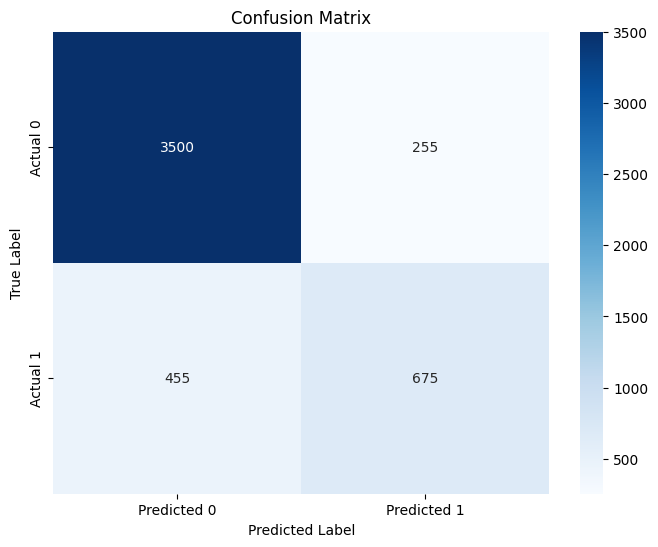

In [224]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
# Calculer les prédictions sur l'ensemble de test
predictions_test = 1 / (1 + np.exp(-X_test_cancer_bias @ trained_weights_adagrad))

# Convertir les probabilités en prédictions binaires (0 ou 1)
y_pred_test = (predictions_test >= 0.5).astype(int)

# Calculer l'accuracy
auc_adagrad = accuracy_score(y_test_cancer, y_pred_test)
print(f"Accuracy: {auc_adagrad}")

# Calculer la precision
precision = precision_score(y_test_cancer, y_pred_test)
print(f"Precision: {precision}")

# Calculer le recall
recall = recall_score(y_test_cancer, y_pred_test)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_test_cancer, y_pred_test)
print(f"F1-score: {f1}")

# Calculer l'AUC (Area Under the Curve)
auc = roc_auc_score(y_test_cancer, predictions_test) # Use probabilities for AUC
print(f"AUC: {auc}")

# Matrice de confusion
cm = confusion_matrix(y_test_cancer, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [225]:


# Calculer l'erreur de généralisation (taux d'erreur)
generalization_error_adagrad = np.mean(y_pred_test != y_test_cancer)

print(f"Erreur de généralisation sur l'ensemble de test : {generalization_error_adagrad}")

Erreur de généralisation sur l'ensemble de test : 0.14534288638689866


# **Recuit Simulé**

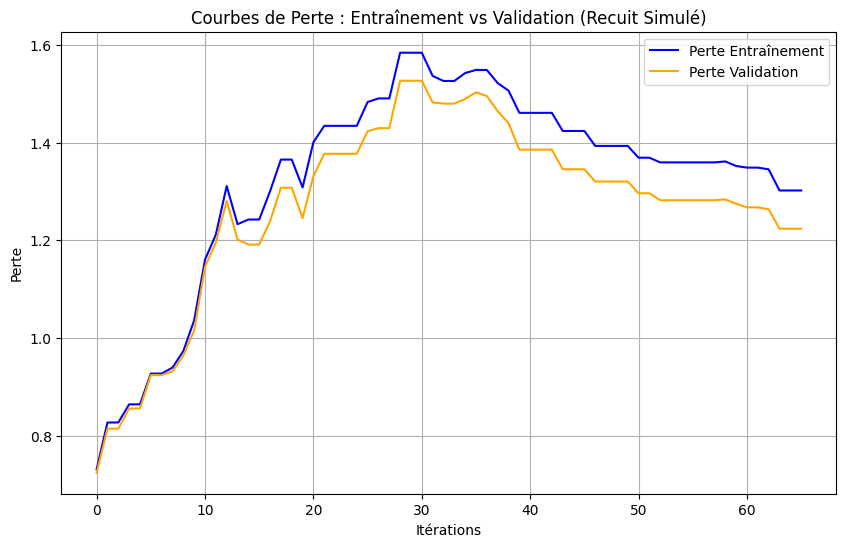

In [226]:
# Recuit Simulé
def simulated_annealing(X, y, X_val, y_val, initial_temp=1.0, final_temp=1e-3, alpha=0.9, n_iter=1000):
    # Initialisation des poids
    weights = np.random.randn(X.shape[1]) * 0.01
    current_loss = logistic_loss(weights, X, y)
    train_losses = []
    val_losses = []

    temperature = initial_temp
     # Démarrer le chronomètre
    start_time = time.time()
    for _ in range(n_iter):
        # Générer une nouvelle solution (perturbation aléatoire)
        new_weights = weights + np.random.normal(0, 0.1, size=weights.shape)
        new_loss = logistic_loss(new_weights, X, y)

        # Calculer la différence de coût
        delta_loss = new_loss - current_loss

        # Décider d'accepter la nouvelle solution
        if delta_loss < 0 or np.random.rand() < np.exp(-delta_loss / temperature):
            weights = new_weights
            current_loss = new_loss

        # Enregistrer les pertes
        train_loss = logistic_loss(weights, X, y)
        val_loss = logistic_loss(weights, X_val, y_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Réduire la température
        temperature *= alpha

        # Vérifier si la température est suffisamment basse
        if temperature < final_temp:
            break

    end_time = time.time()
    convergence_time = end_time - start_time
    return weights, train_losses, val_losses,convergence_time

# Entraîner le modèle avec le Recuit Simulé
trained_weights, train_losses, val_losses,convergence_time = simulated_annealing(X_train_cancer_bias, y_train_cancer, X_val_cancer_bias, y_val_cancer)

# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Perte Entraînement', color='blue')
plt.plot(val_losses, label='Perte Validation', color='orange')
plt.title('Courbes de Perte : Entraînement vs Validation (Recuit Simulé)')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [227]:
trained_weights_recuit, train_losses_recuit, test_losses_recuit, convergence_time_recuit = simulated_annealing(X_train_cancer_bias, y_train_cancer, X_test_cancer_bias, y_test_cancer)
# Afficher les poids entraînés
#print("Poids entraînés :", trained_weights)

# Calculer et afficher la perte finale
final_loss_recuit = logistic_loss(trained_weights_recuit, X_test_cancer_bias, y_test_cancer)
print("Perte finale :", final_loss_recuit)

Perte finale : 1.1215734079317188


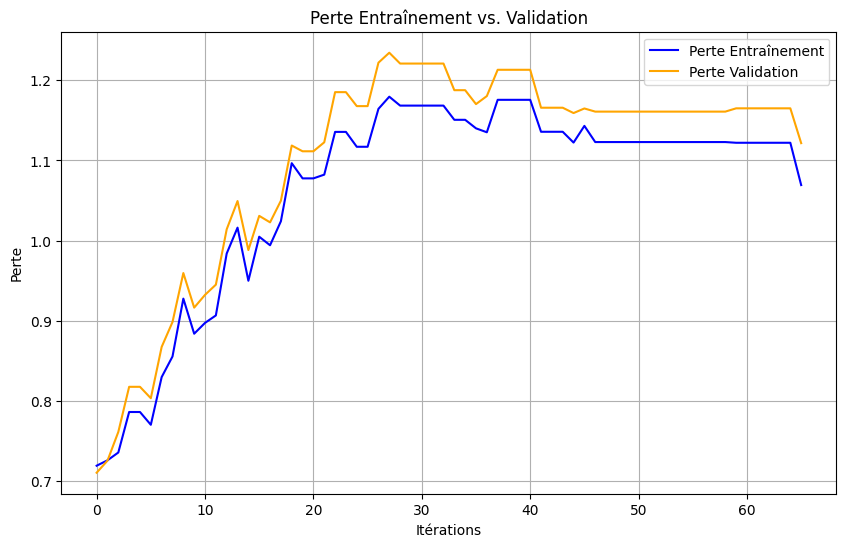

In [228]:
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses_recuit, label='Perte Entraînement', color='blue')
plt.plot(test_losses_recuit, label='Perte Validation', color='orange')
plt.title('Perte Entraînement vs. Validation')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

Accuracy: 0.8546571136131014
Precision: 0.7258064516129032
Recall: 0.5973451327433629
F1-score: 0.6553398058252428
AUC: 0.9024234354194407


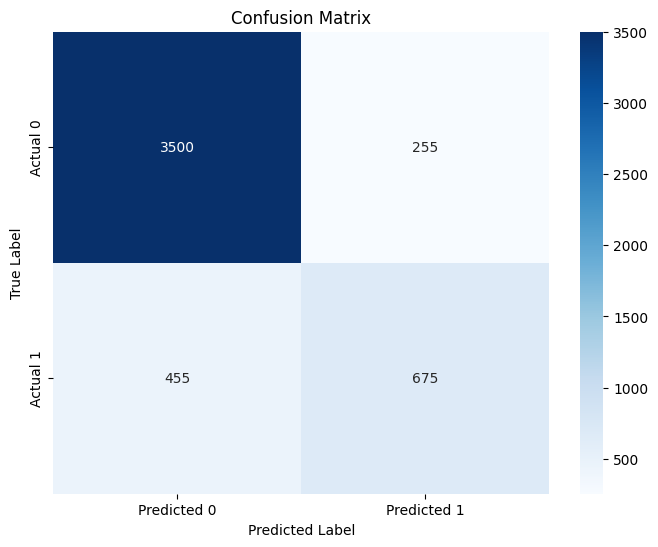

In [229]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
# Calculer les prédictions sur l'ensemble de test
predictions_test = 1 / (1 + np.exp(-X_test_cancer_bias @ trained_weights_adagrad))

# Convertir les probabilités en prédictions binaires (0 ou 1)
y_pred_test = (predictions_test >= 0.5).astype(int)

# Calculer l'accuracy
auc_recuit = accuracy_score(y_test_cancer, y_pred_test)
print(f"Accuracy: {auc_recuit}")

# Calculer la precision
precision = precision_score(y_test_cancer, y_pred_test)
print(f"Precision: {precision}")

# Calculer le recall
recall = recall_score(y_test_cancer, y_pred_test)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_test_cancer, y_pred_test)
print(f"F1-score: {f1}")

# Calculer l'AUC (Area Under the Curve)
auc = roc_auc_score(y_test_cancer, predictions_test) # Use probabilities for AUC
print(f"AUC: {auc}")

# Matrice de confusion
cm = confusion_matrix(y_test_cancer, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [230]:


# Calculer l'erreur de généralisation (taux d'erreur)
generalization_error_recuit = np.mean(y_pred_test != y_test_cancer)

print(f"Erreur de généralisation sur l'ensemble de test : {generalization_error_recuit}")

Erreur de généralisation sur l'ensemble de test : 0.14534288638689866


# **Methode bayesienne**

Poids optimisés : [-3.0, 2.2812077523010466, 2.1404196431821134, 1.2226393370113797, 1.5496177247983205, 3.0, 1.9851647671885377, -0.016169477712213443, 3.0, 2.3982084574927116, 1.4913397849534613, -0.7085315800311727, 3.0, 2.9794910880672614, -0.4502249694568441, 2.6379670687427454, 0.6715993387232593, 1.8923522212973367, 0.5116455569927494, 0.3599855823740308, 0.6952010545150777, 0.3619280911905438, 1.761070406463924, 2.5160374827267216, 1.660743454155833, 2.9729165169019973, -0.14189391611378666, 1.0983130433811459, 0.6586617713708258, 0.5674918856613118, 3.0, 2.037147292344814, 2.697994658011358, -0.70185470488678, 3.0, -0.06420060778623693, -0.8562215598834477, -1.8115861421918928, 0.7937657472671305, 0.08137579537497874, -2.129597476851809, -2.388561574574244, 3.0, -1.7888286264150564, -0.9174727569965024, 2.7893983254418204, 0.1386302726157318, -2.1589497575229735, 0.9997076830804108, -0.2232315365480586, -0.1924289364821794, -1.6740984275440622, -1.6663225346227297, -2.50732390

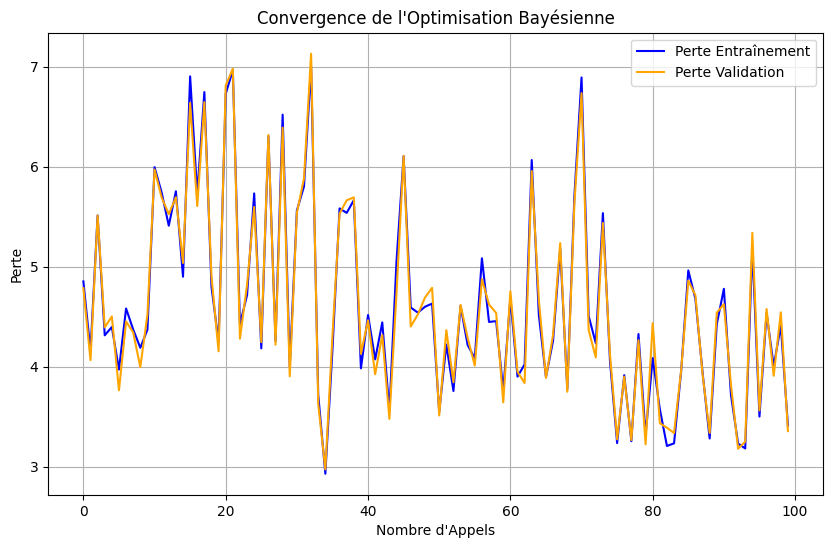

In [231]:
!pip install scikit-optimize
import numpy as np
from sklearn.model_selection import train_test_split
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
import time

# Fonction de coût
def logistic_loss(weights, X, y):
    predictions = 1 / (1 + np.exp(-X @ weights))
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)
    return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

# Fonction à minimiser
def objective(weights):
    weights_array = np.array(weights)
    train_loss = logistic_loss(weights_array, X_train_cancer_bias, y_train_cancer)
    val_loss = logistic_loss(weights_array, X_val_cancer_bias, y_val_cancer)

    # Stocker la perte de validation pour l'affichage
    losses.append(val_loss)  # Ajouter la perte de validation à la liste
    return train_loss  # Retourner seulement la perte d'entraînement pour minimiser

# Définir l'espace de recherche
space = [Real(-3.0, 3.0, name=f'weight_{i}') for i in range(X_train_cancer_bias.shape[1])]

# Initialiser la liste pour les pertes de validation
losses = []

# Mesurer le temps de convergence
start_time = time.time()

# Exécuter l'optimisation bayésienne
result = gp_minimize(objective,                   # Fonction à minimiser
                     space,                      # Espace de recherche
                     n_calls=100,                 # Nombre d'appels à la fonction
                     acq_func='LCB',             # Critère d'acquisition
                     random_state=42)            # Pour la reproductibilité

end_time = time.time()
elapsed_time = end_time - start_time

# Extraire les poids optimisés
optimized_weights = result.x

# Calculer les pertes finales
train_loss_bayes = logistic_loss(optimized_weights, X_train_cancer_bias, y_train_cancer)
val_loss_bayes = logistic_loss(optimized_weights, X_val_cancer_bias, y_val_cancer)

# Afficher les résultats
print(f'Poids optimisés : {optimized_weights}')
print(f'Perte Entraînement : {train_loss_bayes}')
print(f'Perte Validation : {val_loss_bayes}')
print(f'Temps de convergence : {elapsed_time:.2f} secondes')

# Tracer la convergence
plt.figure(figsize=(10, 6))
plt.plot(result.func_vals, label='Perte Entraînement', color='blue')
plt.plot(losses, label='Perte Validation', color='orange')  # Ajouter la courbe de perte de validation
plt.title('Convergence de l\'Optimisation Bayésienne')
plt.xlabel('Nombre d\'Appels')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()


Poids optimisés : [-3.0, 2.2812077523010466, 2.1404196431821134, 1.2226393370113797, 1.5496177247983205, 3.0, 1.9851647671885377, -0.016169477712213443, 3.0, 2.3982084574927116, 1.4913397849534613, -0.7085315800311727, 3.0, 2.9794910880672614, -0.4502249694568441, 2.6379670687427454, 0.6715993387232593, 1.8923522212973367, 0.5116455569927494, 0.3599855823740308, 0.6952010545150777, 0.3619280911905438, 1.761070406463924, 2.5160374827267216, 1.660743454155833, 2.9729165169019973, -0.14189391611378666, 1.0983130433811459, 0.6586617713708258, 0.5674918856613118, 3.0, 2.037147292344814, 2.697994658011358, -0.70185470488678, 3.0, -0.06420060778623693, -0.8562215598834477, -1.8115861421918928, 0.7937657472671305, 0.08137579537497874, -2.129597476851809, -2.388561574574244, 3.0, -1.7888286264150564, -0.9174727569965024, 2.7893983254418204, 0.1386302726157318, -2.1589497575229735, 0.9997076830804108, -0.2232315365480586, -0.1924289364821794, -1.6740984275440622, -1.6663225346227297, -2.50732390

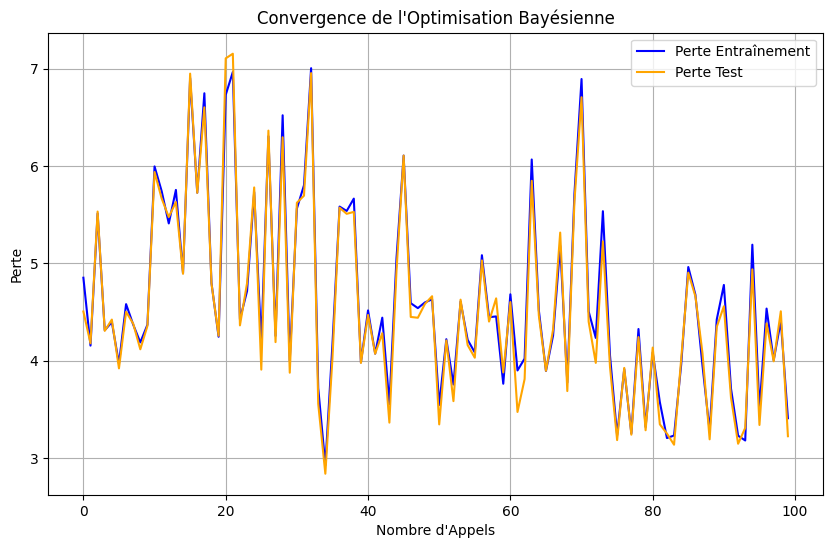

In [232]:

def objective(weights):
    weights_array = np.array(weights)
    train_loss = logistic_loss(weights_array, X_train_cancer_bias, y_train_cancer)
    test_loss = logistic_loss(weights_array, X_test_cancer_bias, y_test_cancer)

    # Stocker la perte de test pour l'affichage
    losses.append(test_loss)  # Ajouter la perte de test à la liste
    return train_loss  # Retourner seulement la perte d'entraînement pour minimiser

# Définir l'espace de recherche
space = [Real(-3.0, 3.0, name=f'weight_{i}') for i in range(X_train_cancer_bias.shape[1])]

# Initialiser la liste pour les pertes de test
losses = []

# Mesurer le temps de convergence
start_time = time.time()

# Exécuter l'optimisation bayésienne
result = gp_minimize(objective,                   # Fonction à minimiser
                     space,                      # Espace de recherche
                     n_calls=100,                 # Nombre d'appels à la fonction
                     acq_func='LCB',             # Critère d'acquisition
                     random_state=42)            # Pour la reproductibilité

end_time = time.time()
elapsed_time = end_time - start_time

# Extraire les poids optimisés
optimized_weights = result.x

# Calculer les pertes finales
train_loss_bayes = logistic_loss(optimized_weights, X_train_cancer_bias, y_train_cancer)
test_loss_bayes = logistic_loss(optimized_weights, X_test_cancer_bias, y_test_cancer)

# Afficher les résultats
print(f'Poids optimisés : {optimized_weights}')
print(f'Perte Entraînement : {train_loss_bayes}')
print(f'Perte Test : {test_loss_bayes}')
print(f'Temps de convergence : {elapsed_time:.2f} secondes')

# Tracer la convergence
plt.figure(figsize=(10, 6))
plt.plot(result.func_vals, label='Perte Entraînement', color='blue')
plt.plot(losses, label='Perte Test', color='orange')  # Ajouter la courbe de perte de test
plt.title('Convergence de l\'Optimisation Bayésienne')
plt.xlabel('Nombre d\'Appels')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()
convergence_time_bayes = elapsed_time

In [233]:
# prompt: calculer l'erreur de generalisation pour ce cas bayesien ainsi que les performances globales du modele sur l'echantillon test

# Calculer les prédictions sur l'ensemble de test avec les poids optimisés par l'optimisation bayésienne
predictions_test_bayes = 1 / (1 + np.exp(-X_test_cancer_bias @ optimized_weights))
y_pred_test_bayes = (predictions_test_bayes >= 0.5).astype(int)

# Calculer l'erreur de généralisation pour l'optimisation bayésienne
generalization_error_bayes = np.mean(y_pred_test_bayes != y_test_cancer)
print(f"Erreur de généralisation (Optimisation Bayésienne) : {generalization_error_bayes}")

# Calculer les performances globales du modèle sur l'échantillon test (Optimisation Bayésienne)
auc_bayes = accuracy_score(y_test_cancer, y_pred_test_bayes)
precision_bayes = precision_score(y_test_cancer, y_pred_test_bayes)
recall_bayes = recall_score(y_test_cancer, y_pred_test_bayes)
f1_bayes = f1_score(y_test_cancer, y_pred_test_bayes)
AUC_bayes = roc_auc_score(y_test_cancer, predictions_test_bayes)

print(f"Performances globales (Optimisation Bayésienne) :")
print(f"Accuracy : {auc_bayes}")
print(f"Precision : {precision_bayes}")
print(f"Recall : {recall_bayes}")
print(f"F1-score : {f1_bayes}")
print(f"AUC : {AUC_bayes}")


Erreur de généralisation (Optimisation Bayésienne) : 0.345957011258956
Performances globales (Optimisation Bayésienne) :
Accuracy : 0.654042988741044
Precision : 0.33981693363844395
Recall : 0.5256637168141592
F1-score : 0.4127866574009729
AUC : 0.6767418073836655


In [234]:


# Calculer l'erreur de généralisation (taux d'erreur)
generalization_error_bayes = np.mean(y_pred_test != y_test_cancer)

print(f"Erreur de généralisation sur l'ensemble de test : {generalization_error_bayes}")

Erreur de généralisation sur l'ensemble de test : 0.14534288638689866


# **Algorithme PSO**

Poids optimisés : [-3.49630331e-01  2.73687108e-01  1.07783591e-01  3.05324933e-01
  7.67205030e-02  1.64157715e-01  1.02898532e-01  3.47768823e-02
  2.33365200e-01  2.55826759e-01  9.68175014e-03  5.46798955e-02
 -1.01363058e-01 -2.91478312e-02 -2.60027524e-01  5.85182201e-02
 -5.38376927e-02 -1.50548101e-01 -2.36985250e-01 -1.27849135e-01
  5.40617322e-02 -4.75310686e-02 -8.67028776e-02 -2.63402671e-02
  7.52827481e-02 -3.00889952e-02 -1.43266324e-01 -1.71425366e-01
  1.40731068e-01  2.13740314e-02 -1.40354220e-02 -1.38711985e-01
  6.96506437e-02 -8.43230861e-02  2.90624254e-01 -1.04723818e-01
 -1.23336738e-02 -2.71831718e-02 -4.29690720e-05  1.08609847e-01
 -3.27410676e-02 -1.88938767e-01  7.28130192e-02  1.47664559e-01
  1.76384949e-01  1.40878943e-01  1.01553858e-01  1.19062458e-01
  1.01336866e-01  1.95092782e-01 -1.10644313e-01 -1.29793698e-01
 -9.50089399e-02  2.13400788e-02 -3.65609157e-02 -2.09003491e-02
 -3.39203882e-02  3.24071175e-02 -9.53359675e-02 -9.12353034e-02
  2.687

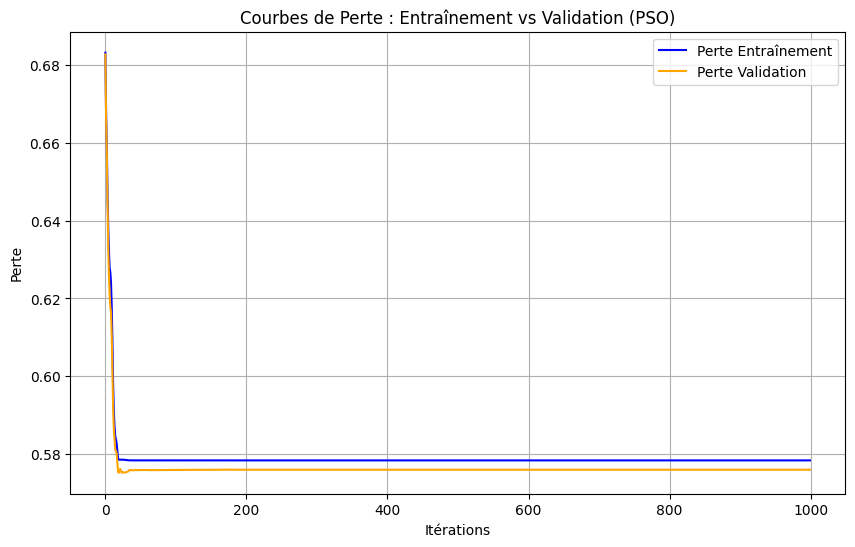

In [235]:
# Algorithme PSO
def particle_swarm_optimization(X, y, X_val, y_val, n_particles=30, n_iterations=1000, w=0.5, c1=1.0, c2=1.0):
    n_features = X.shape[1]
    # Initialisation des particules
    particles = np.random.randn(n_particles, n_features) * 0.01
    velocities = np.random.randn(n_particles, n_features) * 0.01
    personal_best_positions = np.copy(particles)
    personal_best_scores = np.array([logistic_loss(p, X, y) for p in personal_best_positions])

    # Meilleure position globale
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    global_best_score = min(personal_best_scores)

    train_losses = []
    val_losses = []
    # Démarrer le chronomètre
    start_time = time.time()
    for _ in range(n_iterations):
        for i in range(n_particles):
            # Mise à jour de la vitesse
            r1, r2 = np.random.rand(2)
            velocities[i] = (w * velocities[i] +
                             c1 * r1 * (personal_best_positions[i] - particles[i]) +
                             c2 * r2 * (global_best_position - particles[i]))
            # Mise à jour de la position
            particles[i] += velocities[i]

            # Évaluer la nouvelle position
            current_score = logistic_loss(particles[i], X, y)

            # Mise à jour des meilleures positions
            if current_score < personal_best_scores[i]:
                personal_best_scores[i] = current_score
                personal_best_positions[i] = particles[i]

                # Mise à jour de la meilleure position globale
                if current_score < global_best_score:
                    global_best_score = current_score
                    global_best_position = particles[i]

        # Enregistrer les pertes
        train_loss = global_best_score
        val_loss = logistic_loss(global_best_position, X_val, y_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    end_time = time.time()
    convergence_time = end_time - start_time
    return global_best_position, train_losses, val_losses, convergence_time

# Entraîner le modèle avec PSO
optimized_weights_pso, train_losses, val_losses, convergence_time_pso = particle_swarm_optimization(X_train_cancer_bias, y_train_cancer, X_val_cancer_bias, y_val_cancer)

# Afficher les résultats
print(f'Poids optimisés : {optimized_weights_pso}')
#The line below has been changed to fix the error:
print(f'Perte Entraînement : {logistic_loss(optimized_weights_pso, X_train_cancer_bias, y_train_cancer)}') # Changed optimized_weight_pso to optimized_weights_pso
print(f'Perte Validation : {logistic_loss(optimized_weights_pso, X_val_cancer_bias, y_val_cancer)}')

# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Perte Entraînement', color='blue')
plt.plot(val_losses, label='Perte Validation', color='orange')
plt.title('Courbes de Perte : Entraînement vs Validation (PSO)')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

In [236]:
trained_weights_pso, train_losses_pso, test_losses_pso, convergence_time_pso = particle_swarm_optimization(X_train_cancer_bias, y_train_cancer, X_test_cancer_bias, y_test_cancer)
# Afficher les poids entraînés
#print("Poids entraînés :", trained_weights)

# Calculer et afficher la perte finale
final_loss_pso = logistic_loss(trained_weights_pso, X_test_cancer_bias, y_test_cancer)
print("Perte finale :", final_loss_pso)

Perte finale : 0.6154406802264176


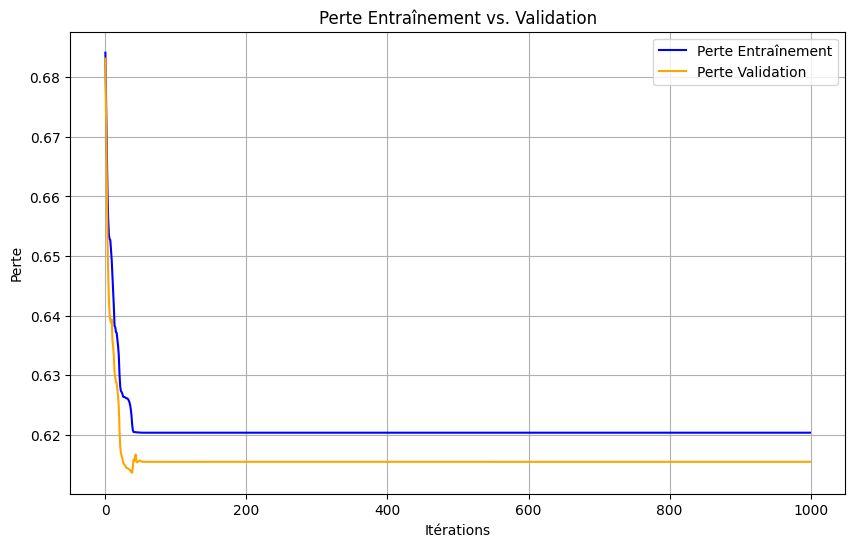

In [237]:
# Tracer les courbes de perte
plt.figure(figsize=(10, 6))
plt.plot(train_losses_pso, label='Perte Entraînement', color='blue')
plt.plot(test_losses_pso, label='Perte Validation', color='orange')
plt.title('Perte Entraînement vs. Validation')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

Accuracy: 0.8546571136131014
Precision: 0.7258064516129032
Recall: 0.5973451327433629
F1-score: 0.6553398058252428
AUC: 0.9024234354194407


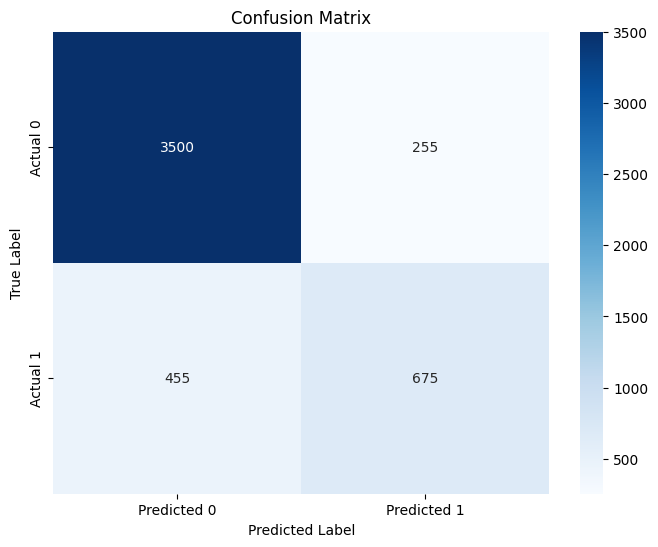

In [238]:
# prompt: calcul de l'accuracy du modeles et toutes ses performances

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
# Calculer les prédictions sur l'ensemble de test
predictions_test = 1 / (1 + np.exp(-X_test_cancer_bias @ trained_weights_adagrad))

# Convertir les probabilités en prédictions binaires (0 ou 1)
y_pred_test = (predictions_test >= 0.5).astype(int)

# Calculer l'accuracy
auc_pso = accuracy_score(y_test_cancer, y_pred_test)
print(f"Accuracy: {auc_pso}")

# Calculer la precision
precision = precision_score(y_test_cancer, y_pred_test)
print(f"Precision: {precision}")

# Calculer le recall
recall = recall_score(y_test_cancer, y_pred_test)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_test_cancer, y_pred_test)
print(f"F1-score: {f1}")

# Calculer l'AUC (Area Under the Curve)
auc = roc_auc_score(y_test_cancer, predictions_test) # Use probabilities for AUC
print(f"AUC: {auc}")

# Matrice de confusion
cm = confusion_matrix(y_test_cancer, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [239]:


# Calculer l'erreur de généralisation (taux d'erreur)
generalization_error_pso = np.mean(y_pred_test != y_test_cancer)

print(f"Erreur de généralisation sur l'ensemble de test : {generalization_error_pso}")

Erreur de généralisation sur l'ensemble de test : 0.14534288638689866


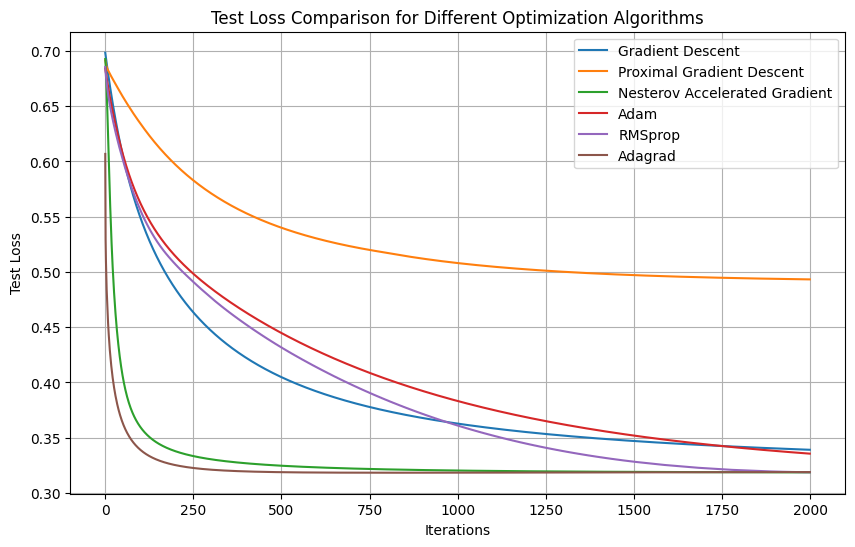

In [240]:

import matplotlib.pyplot as plt

# Assuming test_losses_grad, test_losses_proxgrad, etc. are defined
# Replace with your actual variable names if different

plt.figure(figsize=(10, 6))
plt.plot(test_losses_grad, label='Gradient Descent')
plt.plot(test_losses_proxgrad, label='Proximal Gradient Descent')
plt.plot(test_losses_NAG, label='Nesterov Accelerated Gradient')
plt.plot(test_losses_adam, label='Adam')
plt.plot(test_losses_rmsprop, label='RMSprop')
plt.plot(test_losses_adagrad, label='Adagrad')

plt.title('Test Loss Comparison for Different Optimization Algorithms')
plt.xlabel('Iterations')
plt.ylabel('Test Loss')
plt.legend()
plt.grid(True)
plt.show()

test_losses_bayes not defined. Skipping this plot.


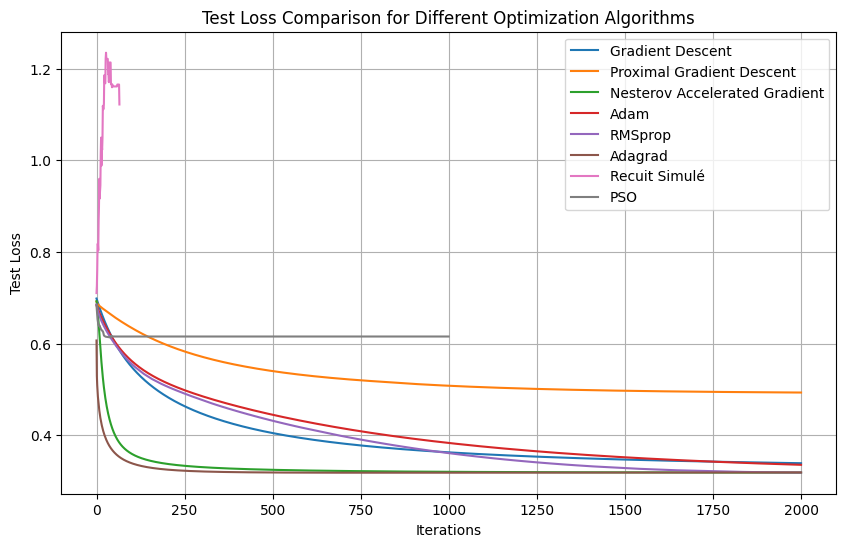

In [241]:
#
plt.figure(figsize=(10, 6))

try:
    plt.plot(test_losses_grad, label='Gradient Descent')
except NameError:
    print("test_losses_grad not defined. Skipping this plot.")

try:
    plt.plot(test_losses_proxgrad, label='Proximal Gradient Descent')
except NameError:
    print("test_losses_proxgrad not defined. Skipping this plot.")

try:
    plt.plot(test_losses_NAG, label='Nesterov Accelerated Gradient')
except NameError:
    print("test_losses_NAG not defined. Skipping this plot.")

try:
    plt.plot(test_losses_adam, label='Adam')
except NameError:
    print("test_losses_adam not defined. Skipping this plot.")

try:
    plt.plot(test_losses_rmsprop, label='RMSprop')
except NameError:
    print("test_losses_rmsprop not defined. Skipping this plot.")

try:
    plt.plot(test_losses_adagrad, label='Adagrad')
except NameError:
    print("test_losses_adagrad not defined. Skipping this plot.")

try:
    plt.plot(test_losses_recuit, label='Recuit Simulé')
except NameError:
    print("test_losses_recuit not defined. Skipping this plot.")

try:
    plt.plot(test_losses_pso, label='PSO')
except NameError:
    print("test_losses_pso not defined. Skipping this plot.")

try:
    plt.plot(test_losses_bayes, label='Optimisation Bayesienne')
except NameError:
    print("test_losses_bayes not defined. Skipping this plot.")


plt.title('Test Loss Comparison for Different Optimization Algorithms')
plt.xlabel('Iterations')
plt.ylabel('Test Loss')
plt.legend()
plt.grid(True)
plt.show()


In [242]:
import pandas as pd

# Supposons que les erreurs de généralisation, les pertes finales et les AUC sont stockées dans des variables
generalization_errors = {
    "Méthode": [
        "Gradient",
        "Proximal Gradient",
        "NAG",
        "Adam",
        "RMSprop",
        "Adagrad",
        "Newton",
        "recuit",
        "bayes",
        "pso"
    ],
    "Erreur de Généralisation": [
        generalization_error_grad,
        generalization_error_proxgrad,
        generalization_error_NAG,
        generalization_error_adam,
        generalization_error_rmsprop,
        generalization_error_adagrad,
        generalization_error_newton,
        generalization_error_recuit,
        generalization_error_bayes,
        generalization_error_pso
    ],
    "Perte Finale": [
        final_loss_grad,
        final_loss_proxgrad,
        final_loss_NAG,
        final_loss_adam,
        final_loss_rmsprop,
        final_loss_adagrad,
        final_loss_newton,
        final_loss_recuit,
        test_loss_bayes,
        final_loss_pso

    ],
    "Temps de Convergence": [
        convergence_time_grad,
        convergence_time_proxgrad,
        convergence_time_NAG,
        convergence_time_adam,
        convergence_time_rmsprop,
        convergence_time_adagrad,
        convergence_time_newton,
        convergence_time_recuit,
        convergence_time_bayes,
        convergence_time_pso
    ],
    "Accuracy": [
        auc_grad,
        auc_proxgrad,
        auc_NAG,
        auc_adam,
        auc_rmsprop,
        auc_adagrad,
        auc_newton,
        auc_recuit,
        auc_bayes,
        auc_pso
    ]
}

# Créer un DataFrame
df_errors = pd.DataFrame(generalization_errors)

# Afficher le DataFrame
df_errors

,Méthode,Erreur de Généralisation,Perte Finale,Temps de Convergence,Accuracy
0,Gradient,0.150051,0.339091,45.920226,0.896796
1,Proximal Gradient,0.205322,0.493245,63.655628,0.847219
2,NAG,0.144115,0.318635,61.470855,0.902662
3,Adam,0.147390,0.335586,60.344333,0.902095
4,RMSprop,0.144524,0.318752,64.307851,0.855476
5,Adagrad,0.145343,0.318941,63.562387,0.854657
6,Newton,0.145548,0.320779,54.507297,0.901266
7,recuit,0.145343,1.121573,1.653550,0.854657
8,bayes,0.145343,2.840041,372.772579,0.654043
9,pso,0.145343,0.615441,244.201341,0.854657


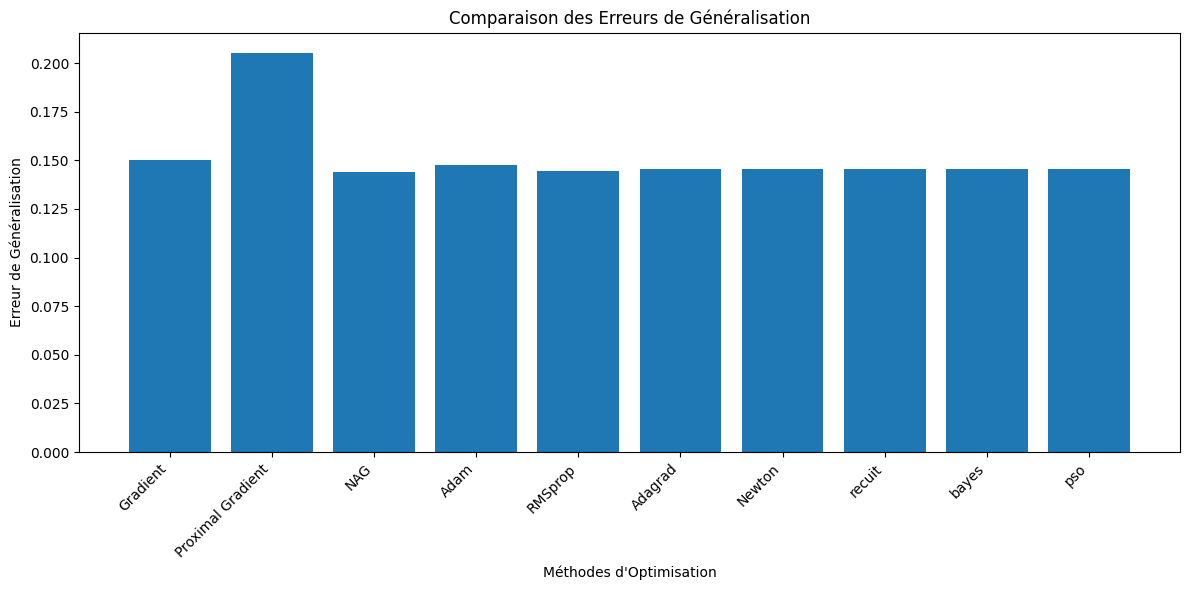

In [243]:
# prompt: fais moi un graphique des erreurs de generalisation pour mettant en lumiere chaque methode

import matplotlib.pyplot as plt

# Assuming df_errors is defined as in the provided code

plt.figure(figsize=(12, 6))
plt.bar(df_errors['Méthode'], df_errors['Erreur de Généralisation'])
plt.xlabel("Méthodes d'Optimisation")
plt.ylabel("Erreur de Généralisation")
plt.title("Comparaison des Erreurs de Généralisation")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
